# Time Series Analysis for Retail Sales Forecasting

<ins>**Problem Statement** </ins>

The challenge is to develop a predictive model that can accurately forecast sales for a diverse range of products across different customer segments and regions, based on historical sales data.

<ins>**Understanding the Context of the Problem**</ins>

Market Dynamics: The retail industry is characterized by seasonality, product lifecycle, and consumer demand fluctuations. Understanding these aspects is essential to predict sales effectively.

Competition and Market Trends: Keeping abreast of changing market trends and competitive strategies is crucial for accurate forecasting.


<ins>**Project's Overall Objective:**</ins>

To develop a robust, scalable time series forecasting model to predict retail sales, incorporating trends, seasonality, and other temporal factors.


<ins>**Business Impact:**</ins>

The outcomes from this project will provide actionable insights for inventory management, marketing strategy, and decision-making.


<ins>**Understanding Stakeholder Needs, Capabilities, and Expectations**</ins>

- Business Executives: Expect reliable forecasts to inform high-stakes decisions.
- Sales and Marketing Teams: Need short-term forecasts for dynamic campaign management.
- Inventory Managers: Require medium-range forecasts for inventory planning.
- Data Science Team: Aim to leverage advanced analytical techniques for high-accuracy predictions.

<ins>**Scope of the Project**</ins>

- Data Scope: Analyze historical sales data, focusing on trends, seasonality, and product performance.

- Analysis Scope: Develop a model capable of providing both granular and aggregated sales forecasts.


<ins>**Identify the Desired Output**</ins>

- Primary Output: A machine learning model that forecasts sales with high accuracy.

- Secondary Outputs: Dashboards and reports for stakeholders to visualize and understand sales trends.

<ins>**Measurable Objectives**</ins>

- Quantitative Goals: Aim to achieve a forecast accuracy within a specified percentage of actual sales.

- Qualitative Goals: Provide insights into sales drivers and patterns.

<ins>**Identify Metrics for Success**</ins>

- Primary Metrics: Mean Absolute Percentage Error (MAPE) and Root Mean Square Error (RMSE) for forecast accuracy.

- Secondary Metrics: User adoption rate of forecasting tools and stakeholder satisfaction.

<ins>**Set Targets for These Metrics**</ins>

- MAPE: Target a MAPE of less than 10%.

- RMSE: Set a target based on the distribution of sales data, aiming for the lowest feasible RMSE.

<ins>**Identify Time Constraints**</ins>

Project Timeline: Set a timeline with milestones for data preparation, model development, evaluation, and deployment.

Reforecasting Frequency: Determine how often the model will be updated with new data.

<ins>**Identify Budget Constraints**</ins>

Resource Allocation: Define the budget for tools, platforms, and any additional resources required for the project.

<ins>**Identify Technical Constraints**</ins>

Infrastructure: Assess the availability of computational resources for data processing and model training.

Software and Tools: Identify the software requirements and ensure compatibility with existing systems.

# Data Source and Description
Source: Kaggle, https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

The dataset for this project comes from a retail sales dataset that captures transactional data across various product segments and geographies within the United States. It records sales from a range of products, detailing each transaction's customer, product, and regional attributes.

The dataset is structured in a tabular format and includes the following fields:

- Row ID: A unique identifier for each row.
- Order ID: A unique identifier for each order.
- Order Date: The date on which the order was placed.
- Ship Date: The date the order was shipped to the customer.
- Ship Mode: The mode of shipment used for order delivery.
- Customer ID: A unique identifier for each customer.
- Customer Name: The name of the customer.
- Segment: The market segment to which the customer belongs.
- Country: The country of the order placement, which is the United States for all records.
- City: The city where the order was placed.
- State: The state where the order was placed.
- Postal Code: The postal code for the order location.
- Region: The region where the order was placed.
- Product ID: A unique identifier for each product.
- Category: The high-level category of the product.
- Sub-Category: The sub-category of the product.
- Product Name: The name of the product.
- Sales: The sales amount for the transaction.

<ins>**Key Aspects**</ins>

The dataset captures a rich blend of categorical and numerical data, providing a multifaceted view of the sales process.
The temporal component is reflected in the ```'Order Date'``` and ```'Ship Date'```, which are vital for analyzing sales trends over time.

Sales data is granulated by various categorical dimensions such as ```'Product Category'```, ```'Sub-Category'```, and ```'Region'```, which can be leveraged to gain deeper insights into sales performance.

<ins>**Initial Observations**</ins>

The dataset spans multiple years, providing ample data for understanding long-term trends.
There is a diverse range of products and categories, suggesting the potential for a detailed product-level analysis.
Sales figures vary widely, indicating the presence of both high-ticket and low-ticket products, which can affect the forecasting model's approach.

# Import Libraries and Load Data

In [4]:
# Autoreload modules before executing code
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# EDA, Feature Engineering and Data Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Pandas Styling
import jinja2
pd.set_option('display.max_colwidth', None)

# Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Feature Selection
from scipy.stats import f_oneway # ANOVA

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Model Training
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima


# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.optimizers import Adam



# Model Evaluation


In [6]:
df = pd.read_csv('../data/raw/train.csv')
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0      42420.0  South  FUR-BO-10001798        Furniture    Bookcases   
1      42420.0  South  FUR-CH-10000454        Furniture       Chairs   
2      90036.0   West  OFF-LA-10000240  Office Supplies       Labels   
3      33311.0  South  FUR-TA-10000577        Furniture       Tables   
4      33311.0  South  OFF-ST-10000760  Office Supplies      Storage   

                                                  Product Name     Sales  
0                            Bush Somerset Collection Bookcase  261.9600  
1  Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back  731.9400  
2    Self-Adhesive Address Labels for Typewriters by Universal   14.6200  
3                Bretford CR4500 Series Slim Rectangular Table  957.5775  
4                               Eldon Fold 'N Roll Cart System   22.3680

In [7]:
df.shape

(9800, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

# Preliminary Feature Engineering

In [9]:
# Before we begin the EDA process, we drop features that are not relevant to our analysis
# Usually, these are high cardinality columns like IDs or names
columns_to_drop = ['Row ID','Order ID', 'Customer ID', 'Postal Code', 'Product ID']
df = df.drop(columns=columns_to_drop)
df.head()

Order Date   Ship Date       Ship Mode    Customer Name    Segment  \
0  08/11/2017  11/11/2017    Second Class      Claire Gute   Consumer   
1  08/11/2017  11/11/2017    Second Class      Claire Gute   Consumer   
2  12/06/2017  16/06/2017    Second Class  Darrin Van Huff  Corporate   
3  11/10/2016  18/10/2016  Standard Class   Sean O'Donnell   Consumer   
4  11/10/2016  18/10/2016  Standard Class   Sean O'Donnell   Consumer   

         Country             City       State Region         Category  \
0  United States        Henderson    Kentucky  South        Furniture   
1  United States        Henderson    Kentucky  South        Furniture   
2  United States      Los Angeles  California   West  Office Supplies   
3  United States  Fort Lauderdale     Florida  South        Furniture   
4  United States  Fort Lauderdale     Florida  South  Office Supplies   

  Sub-Category                                                 Product Name  \
0    Bookcases                            Bush Somerset Collection Bookcase   
1       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back   
2       Labels    Self-Adhesive Address Labels for Typewriters by Universal   
3       Tables                Bretford CR4500 Series Slim Rectangular Table   
4      Storage                               Eldon Fold 'N Roll Cart System   

      Sales  
0  261.9600  
1  731.9400  
2   14.6200  
3  957.5775  
4   22.3680

In [10]:
# Convert the date columns to datetime objects
# Adjust the format '%d/%m/%Y'
# Extract meaningful features
def process_date_column(df, date_column, drop_original_date=False):
    """
    Converts a date column to datetime and extracts numerical features from it.

    Parameters:
    df (DataFrame): The pandas DataFrame.
    date_column (str): The name of the date column to be processed.
    drop_original_date (bool): Whether to drop the original date column.

    Returns:
    DataFrame: The pandas DataFrame with the new date-related features.
    """
    # Convert the date column to datetime object
    df[date_column] = pd.to_datetime(df[date_column], format='%d/%m/%Y')  # Adjust format as needed

    # Extract features
    df[date_column + '_Year'] = df[date_column].dt.year
    df[date_column + '_Month'] = df[date_column].dt.month
    df[date_column + '_Day'] = df[date_column].dt.day
    df[date_column + '_DayOfWeek'] = df[date_column].dt.dayofweek
    df[date_column + '_DayOfYear'] = df[date_column].dt.dayofyear
    df[date_column + '_Quarter'] = df[date_column].dt.quarter
    df[date_column + '_WeekOfYear'] = df[date_column].dt.isocalendar().week

    # Optionally drop the original date column
    if drop_original_date:
        df = df.drop(columns=[date_column])

    return df

# Call the Function
df = process_date_column(df, 'Order Date', drop_original_date=False)
df = process_date_column(df, 'Ship Date', drop_original_date=False)

In addition to converting the date column to a datetime object, we also extract numeric features from the date as having these individual features may prove insightful to our analysis.

For example:

```DayOfWeek:``` The day of the week can be useful for identifying weekly patterns in sales.

```DayOfYear:``` This could be useful for identifying patterns across different days of the year.

```Quarter:``` Useful for analysis on a quarterly basis, which can align with business quarters.

```WeekOfYear:``` Helpful for weekly trend analysis and seasonal effects.

In [11]:
# Result of dataframe after preliminary feature engineering
df.head(10)

Order Date  Ship Date       Ship Mode    Customer Name    Segment  \
0 2017-11-08 2017-11-11    Second Class      Claire Gute   Consumer   
1 2017-11-08 2017-11-11    Second Class      Claire Gute   Consumer   
2 2017-06-12 2017-06-16    Second Class  Darrin Van Huff  Corporate   
3 2016-10-11 2016-10-18  Standard Class   Sean O'Donnell   Consumer   
4 2016-10-11 2016-10-18  Standard Class   Sean O'Donnell   Consumer   
5 2015-06-09 2015-06-14  Standard Class  Brosina Hoffman   Consumer   
6 2015-06-09 2015-06-14  Standard Class  Brosina Hoffman   Consumer   
7 2015-06-09 2015-06-14  Standard Class  Brosina Hoffman   Consumer   
8 2015-06-09 2015-06-14  Standard Class  Brosina Hoffman   Consumer   
9 2015-06-09 2015-06-14  Standard Class  Brosina Hoffman   Consumer   

         Country             City       State Region         Category  ...  \
0  United States        Henderson    Kentucky  South        Furniture  ...   
1  United States        Henderson    Kentucky  South        Furniture  ...   
2  United States      Los Angeles  California   West  Office Supplies  ...   
3  United States  Fort Lauderdale     Florida  South        Furniture  ...   
4  United States  Fort Lauderdale     Florida  South  Office Supplies  ...   
5  United States      Los Angeles  California   West        Furniture  ...   
6  United States      Los Angeles  California   West  Office Supplies  ...   
7  United States      Los Angeles  California   West       Technology  ...   
8  United States      Los Angeles  California   West  Office Supplies  ...   
9  United States      Los Angeles  California   West  Office Supplies  ...   

  Order Date_DayOfYear Order Date_Quarter  Order Date_WeekOfYear  \
0                  312                  4                     45   
1                  312                  4                     45   
2                  163                  2                     24   
3                  285                  4                     41   
4                  285                  4                     41   
5                  160                  2                     24   
6                  160                  2                     24   
7                  160                  2                     24   
8                  160                  2                     24   
9                  160                  2                     24   

   Ship Date_Year  Ship Date_Month  Ship Date_Day  Ship Date_DayOfWeek  \
0            2017               11             11                    5   
1            2017               11             11                    5   
2            2017                6             16                    4   
3            2016               10             18                    1   
4            2016               10             18                    1   
5            2015                6             14                    6   
6            2015                6             14                    6   
7            2015                6             14                    6   
8            2015                6             14                    6   
9            2015                6             14                    6   

   Ship Date_DayOfYear  Ship Date_Quarter  Ship Date_WeekOfYear  
0                  315                  4                    45  
1                  315                  4                    45  
2                  167                  2                    24  
3                  292                  4                    42  
4                  292                  4                    42  
5                  165                  2                    24  
6                  165                  2                    24  
7                  165                  2                    24  
8                  165                  2                    24  
9                  165                  2                    24  

[10 rows x 27 columns]

# Exploratory Data Analysis

- [ ]  Summary statistics
- [ ]  Handle missing values (imputation, deletion, etc.)
- [ ]  Handle duplicate entries
- [ ]  The cardinality of categorical variables
- [ ]  Conduct univariate analysis
- [ ]  Conduct bivariate analysis
- [ ]  Visualize distributions
- [ ]  Visualize correlations
- [ ]  Visualize outliers
- [ ]  Handle outliers (capping, transformation, etc.)



## Summary Statistics

In [12]:
# Display summary statistics for numerical features
summary_stats = df.describe().round(2)
print(summary_stats)


                          Order Date                      Ship Date     Sales  \
count                           9800                           9800   9800.00   
mean   2017-05-01 05:13:51.673469440  2017-05-05 04:17:52.653061120    230.77   
min              2015-01-03 00:00:00            2015-01-07 00:00:00      0.44   
25%              2016-05-24 00:00:00            2016-05-27 18:00:00     17.25   
50%              2017-06-26 00:00:00            2017-06-29 00:00:00     54.49   
75%              2018-05-15 00:00:00            2018-05-19 00:00:00    210.60   
max              2018-12-30 00:00:00            2019-01-05 00:00:00  22638.48   
std                              NaN                            NaN    626.65   

       Order Date_Year  Order Date_Month  Order Date_Day  \
count          9800.00           9800.00         9800.00   
mean           2016.72              7.82           15.49   
min            2015.00              1.00            1.00   
25%            2016.00        

## Handle Missing Values

In [13]:
# Identify missing values as a percentage of the total number of observations.
missing_values = df.isnull().sum()/len(df)*100
print(missing_values.round(2))

Order Date               0.0
Ship Date                0.0
Ship Mode                0.0
Customer Name            0.0
Segment                  0.0
Country                  0.0
City                     0.0
State                    0.0
Region                   0.0
Category                 0.0
Sub-Category             0.0
Product Name             0.0
Sales                    0.0
Order Date_Year          0.0
Order Date_Month         0.0
Order Date_Day           0.0
Order Date_DayOfWeek     0.0
Order Date_DayOfYear     0.0
Order Date_Quarter       0.0
Order Date_WeekOfYear    0.0
Ship Date_Year           0.0
Ship Date_Month          0.0
Ship Date_Day            0.0
Ship Date_DayOfWeek      0.0
Ship Date_DayOfYear      0.0
Ship Date_Quarter        0.0
Ship Date_WeekOfYear     0.0
dtype: float64


## Separate Numerical Columns and Categorical Columns

In [14]:
# Select numerical columns and create a new dataframe for numerical features
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features_df = df[numerical_columns].copy()

# Select categorical columns and create a new dataframe for categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_features_df = df[categorical_columns].copy()

In [15]:
# Option 1: Impute missing values
# For numerical features
# df['numerical_feature'] = df['numerical_feature'].fillna(df['numerical_feature'].mean())
# # For categorical features
# df['categorical_feature'] = df['categorical_feature'].fillna(df['categorical_feature'].mode()[0])

# Option 2: Drop rows with missing values
df = df.dropna()

In [16]:
# Re-check for missing values
# Identify missing values as a percentage of the total number of observations.
missing_values = df.isnull().sum()/len(df)*100
print(missing_values.round(2))

Order Date               0.0
Ship Date                0.0
Ship Mode                0.0
Customer Name            0.0
Segment                  0.0
Country                  0.0
City                     0.0
State                    0.0
Region                   0.0
Category                 0.0
Sub-Category             0.0
Product Name             0.0
Sales                    0.0
Order Date_Year          0.0
Order Date_Month         0.0
Order Date_Day           0.0
Order Date_DayOfWeek     0.0
Order Date_DayOfYear     0.0
Order Date_Quarter       0.0
Order Date_WeekOfYear    0.0
Ship Date_Year           0.0
Ship Date_Month          0.0
Ship Date_Day            0.0
Ship Date_DayOfWeek      0.0
Ship Date_DayOfYear      0.0
Ship Date_Quarter        0.0
Ship Date_WeekOfYear     0.0
dtype: float64


In [17]:
# Re-check shape of dataframe after dropping missing values
df.shape

(9800, 27)

## Handle Duplicate Entries

In [18]:
# Identify and drop duplicate rows
print(df.duplicated().sum())
# df = df.drop_duplicates()


1


## Check Cardinality of Categorical Features


In [19]:
# Calculate the cardinality for each categorical column
cardinality = df[categorical_columns].nunique().sort_values(ascending=False)
print(cardinality)


Product Name     1849
Customer Name     793
City              529
State              49
Sub-Category       17
Ship Mode           4
Region              4
Segment             3
Category            3
Country             1
dtype: int64


## Conduct Univariate Analysis

<ins>**Explanation of Measures**</ins>

**Kurtosis**

```Kurtosis``` is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In simpler terms, it describes the shape of the peak of a distribution.

_High Kurtosis (> 3):_ The distribution has heavier tails and a sharper peak than the normal distribution. It indicates a high probability of extreme values, which could be outliers.

_Low Kurtosis (< 3):_ The distribution is flatter than a normal distribution with lighter tails. This means fewer outliers.

_Normal Kurtosis (≈ 3):_ The distribution is similar to a normal distribution in terms of its tail shape and peakness.

**Skewness**

```Skewness``` measures the asymmetry of the probability distribution of a real-valued random variable about its mean. It indicates whether the data is shifted to one side (left or right).

_Positive Skewness:_ The tail on the right side of the distribution is longer or fatter than the left side. It indicates that the bulk of the values (possibly including the median) lie to the left of the mean.

_Negative Skewness:_ The tail on the left side is longer or fatter than the right side. Here, the bulk of the values lie to the right of the mean.

_Zero Skewness:_ The values are relatively evenly distributed on both sides of the mean, typically (but not necessarily) implying a symmetric distribution.

**Standard Deviation**

```Standard deviation``` is a measure of the amount of variation or dispersion in a set of values. It quantifies the degree to which the numbers in the dataset deviate from the mean (average) of the dataset.

_High Standard Deviation:_ Indicates that the data points are spread out over a wider range of values, meaning there is a lot of variability in the dataset.

_Low Standard Deviation:_ Implies that the data points are generally close to the mean, indicating less variability or dispersion.

<ins>**Explanation of Indicators:**</ins>

```Mean and Median Difference:``` A large difference between the mean and median can indicate a skewed distribution.

```High Variation:``` If the standard deviation is greater than the mean, it suggests high variability in the data.

```Skewness:``` A skewness value greater than 1 or less than -1 indicates a highly skewed distribution.

```Kurtosis:``` A kurtosis value significantly greater than 3 or less than -3 indicates a distribution that is unusually peaked or flat.

```Category Dominance:``` In categorical data, if one category dominates more than 50% of the dataset, it might significantly influence the analysis.

In [20]:
# Numerical Features Univariate Analysis with Indicators
for col in numerical_features_df.columns:
    mean = numerical_features_df[col].mean()
    median = numerical_features_df[col].median()
    std_dev = numerical_features_df[col].std()
    skewness = numerical_features_df[col].skew()
    kurtosis = numerical_features_df[col].kurt()

    print(f"--- Univariate Analysis of {col} ---")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    # Indicator for large deviation between mean and median
    if abs(mean - median) > std_dev:
        print("Indicator: Mean and median significantly differ.")
    print(f"Standard Deviation: {std_dev}")
    # Indicator for high variance
    if std_dev > mean:
        print("Indicator: High variation in data.")
    print(f"Skewness: {skewness}")
    # Indicator for skewness
    if abs(skewness) > 1:
        print("Indicator: Data is highly skewed.")
    print(f"Kurtosis: {kurtosis}")
    # Indicator for kurtosis
    if abs(kurtosis) > 3:
        print("Indicator: Unusual peakiness or flatness in data distribution.")
    print("\n")

# Categorical Features Univariate Analysis with Indicators
for col in categorical_features_df.columns:
    mode = categorical_features_df[col].mode()[0]
    counts = categorical_features_df[col].value_counts()
    max_count = counts.iloc[0]
    total_counts = counts.sum()

    print(f"--- Univariate Analysis of {col} ---")
    print(f"Mode: {mode}")
    print(f"Counts:\n{counts}")
    # Indicator for dominance of a single category
    if max_count / total_counts > 0.5:
        print("Indicator: A single category dominates more than 50% of the data.")
    print("\n")


--- Univariate Analysis of Sales ---
Mean: 230.7690594591837
Median: 54.489999999999995
Standard Deviation: 626.6518748388042
Indicator: High variation in data.
Skewness: 12.983482865034619
Indicator: Data is highly skewed.
Kurtosis: 304.4450883210413
Indicator: Unusual peakiness or flatness in data distribution.


--- Univariate Analysis of Ship Mode ---
Mode: Standard Class
Counts:
Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64
Indicator: A single category dominates more than 50% of the data.


--- Univariate Analysis of Customer Name ---
Mode: William Brown
Counts:
Customer Name
William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Chloris Kastensmidt    32
                       ..
Jocasta Rupert          1
Carl Jackson            1
Sung Chung              1
Ricardo Emerson         1
Anthony O'Donnell       1
Name: count, Length: 793, dtype: int64


---

## Variables that require special attention

In [21]:
def highlight_attention_needed(df):
    attention_needed = []

    # Numerical Features Analysis
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        std_dev = df[col].std()
        skewness = df[col].skew()
        kurtosis = df[col].kurt()

        # Criteria for flagging attention
        if std_dev > mean or abs(skewness) > 1 or abs(kurtosis) > 3:
            attention_needed.append(col)

    # Categorical Features Analysis
    for col in df.select_dtypes(include=['object']).columns:
        max_count = df[col].value_counts().iloc[0]
        total_counts = len(df[col])

        # Criteria for flagging attention
        if max_count / total_counts > 0.5:
            attention_needed.append(col)

    return attention_needed

# Assuming your DataFrame is named 'df'
variables_requiring_attention = highlight_attention_needed(df)

print("Variables requiring special attention:", variables_requiring_attention)

Variables requiring special attention: ['Sales', 'Ship Mode', 'Segment', 'Country', 'Category']


## Conduct Bivariate Analysis

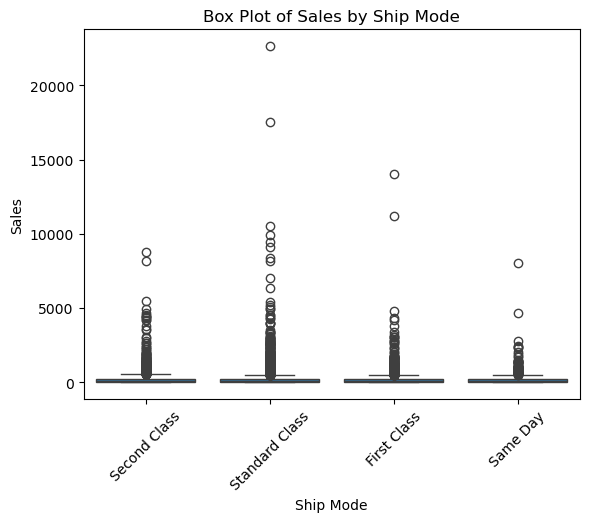

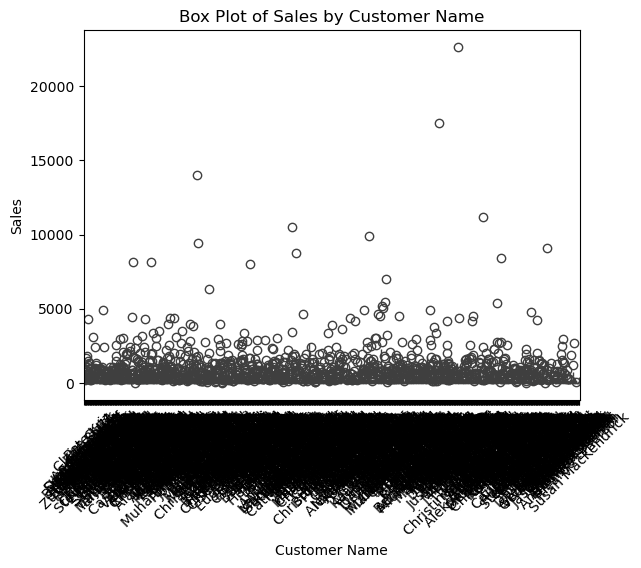

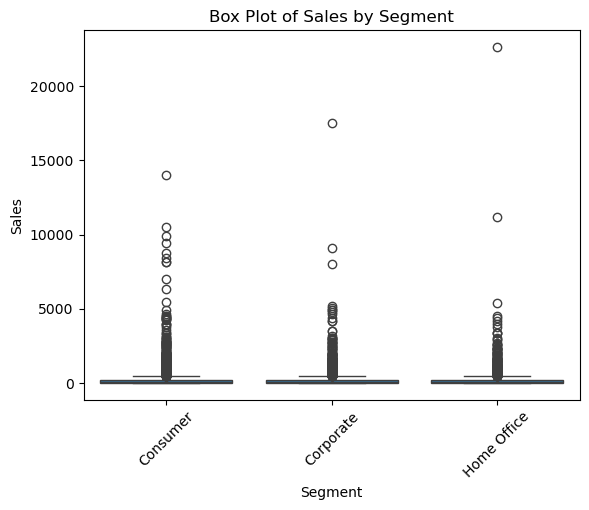

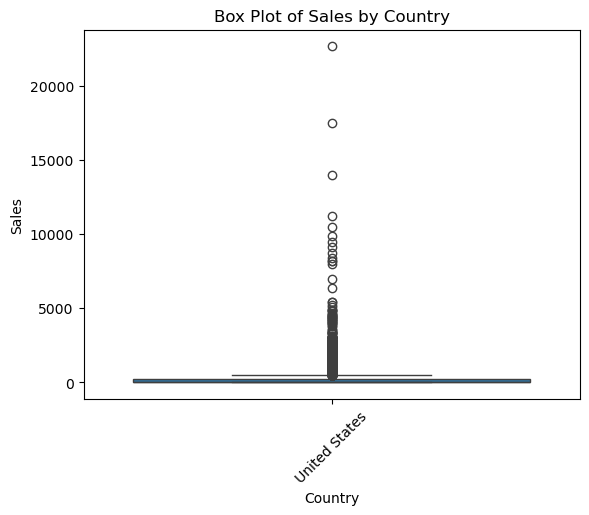

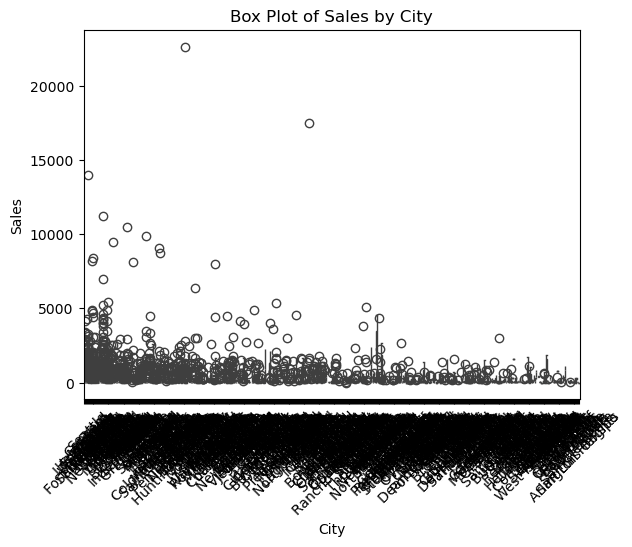

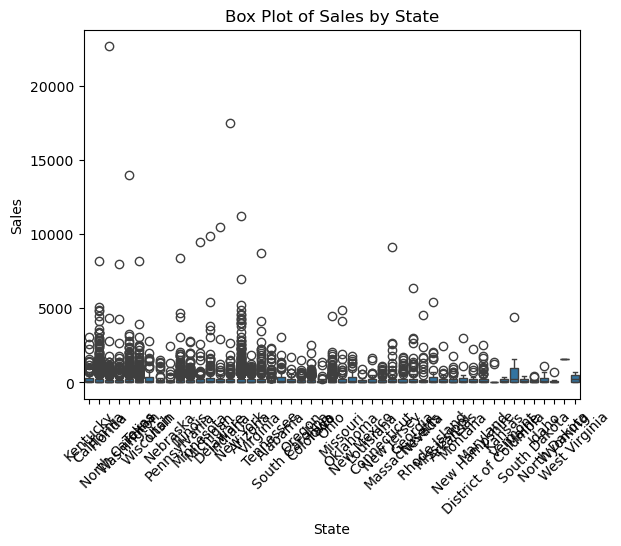

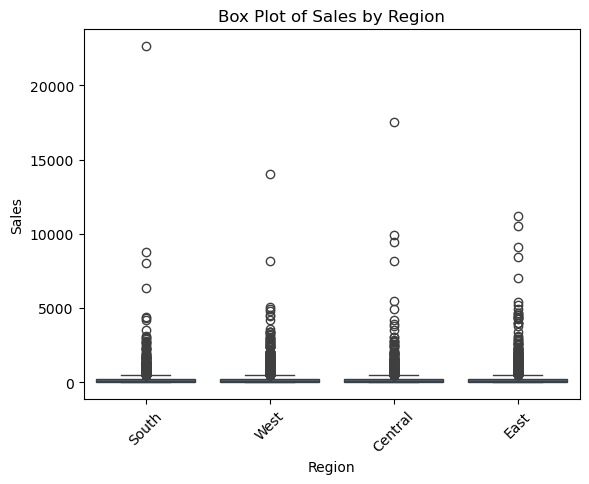

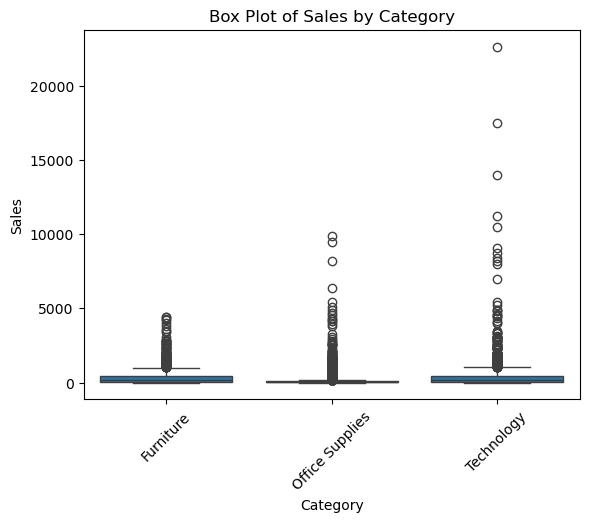

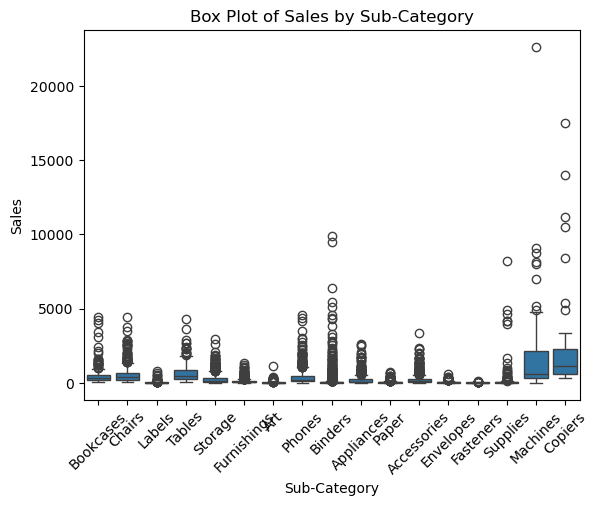

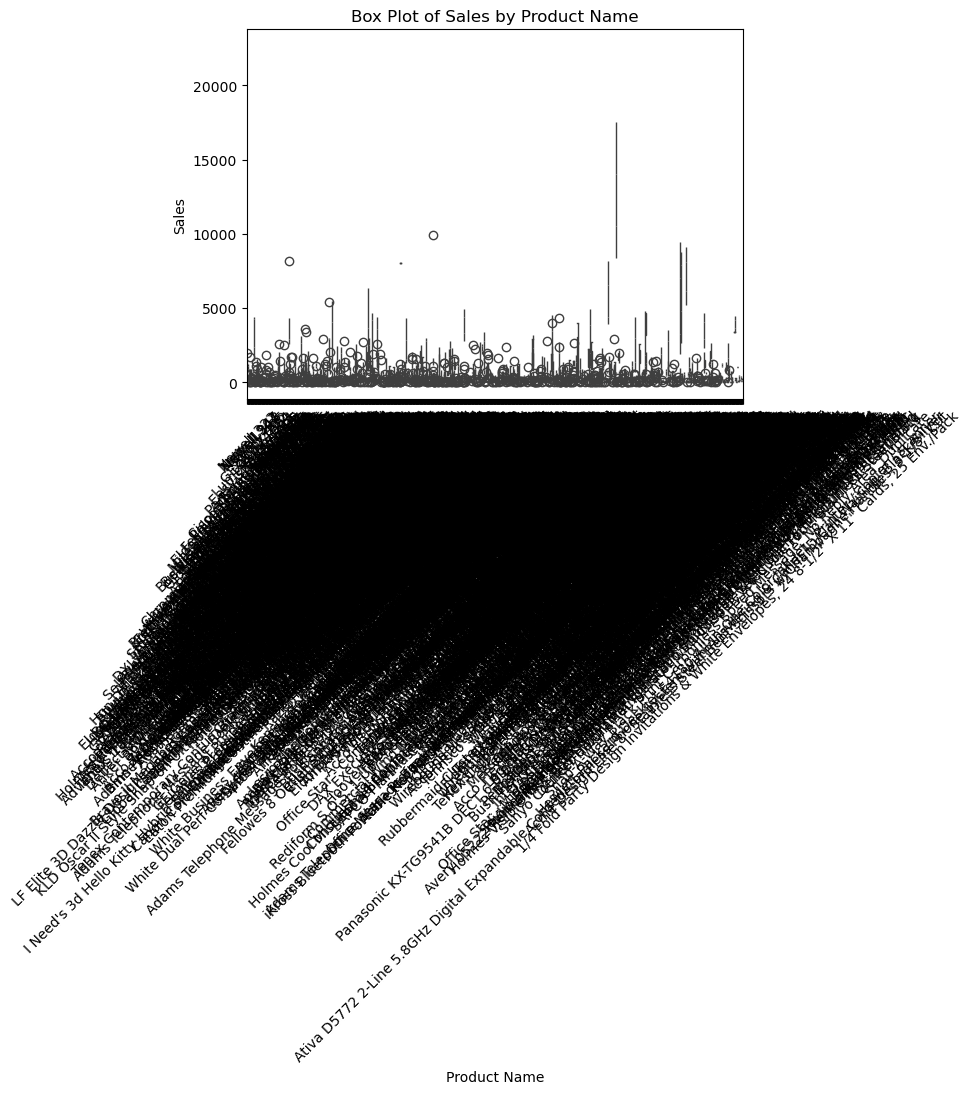

In [22]:
# Assuming 'numerical_features_df' is your DataFrame with all numerical features
# and 'categorical_features_df' is your DataFrame with all categorical features

# Conduct bivariate analysis for all combinations of numerical features
for i in range(len(numerical_features_df.columns)):
    for j in range(i + 1, len(numerical_features_df.columns)):
        sns.scatterplot(x=numerical_features_df.columns[i], y=numerical_features_df.columns[j], data=numerical_features_df)
        plt.title(f'Scatter Plot between {numerical_features_df.columns[i]} and {numerical_features_df.columns[j]}')
        plt.show()

# Conduct bivariate analysis between all numerical and categorical features
for cat_col in categorical_features_df.columns:
    for num_col in numerical_features_df.columns:
        sns.boxplot(x=cat_col, y=num_col, data=df)  # Make sure 'df' is the original DataFrame containing both types of features
        plt.xticks(rotation=45)
        plt.title(f'Box Plot of {num_col} by {cat_col}')
        plt.show()


## Visualize Distributions

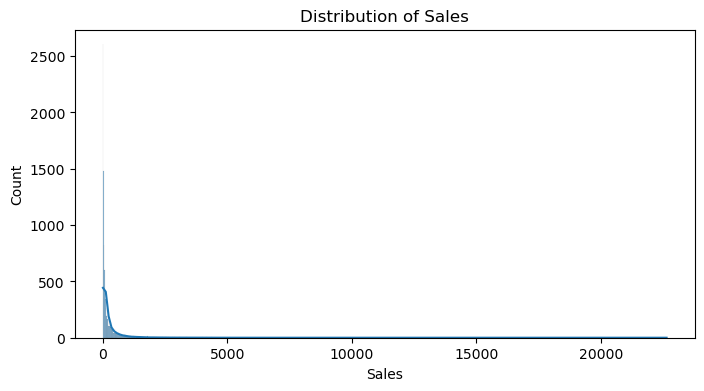

In [23]:
# Histograms for each numerical variable
for col in numerical_features_df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numerical_features_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

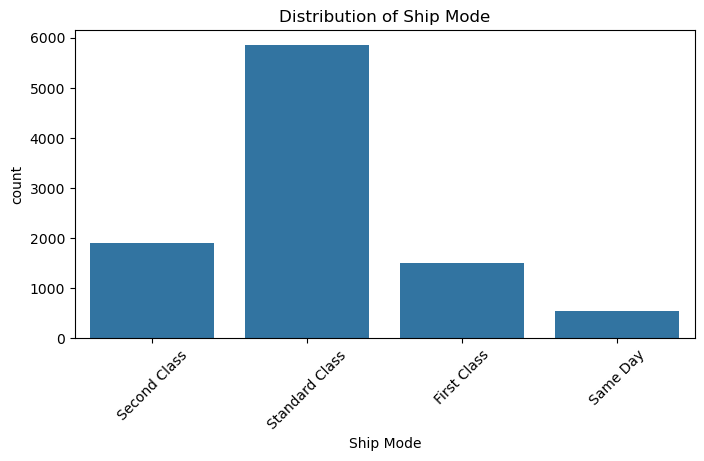

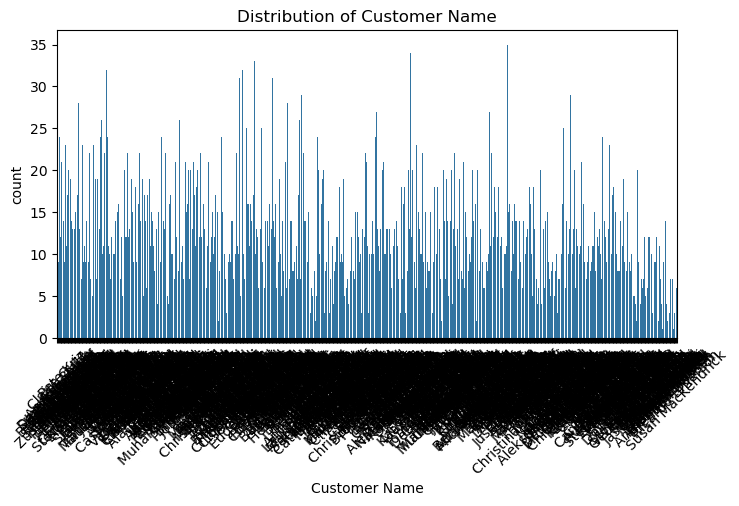

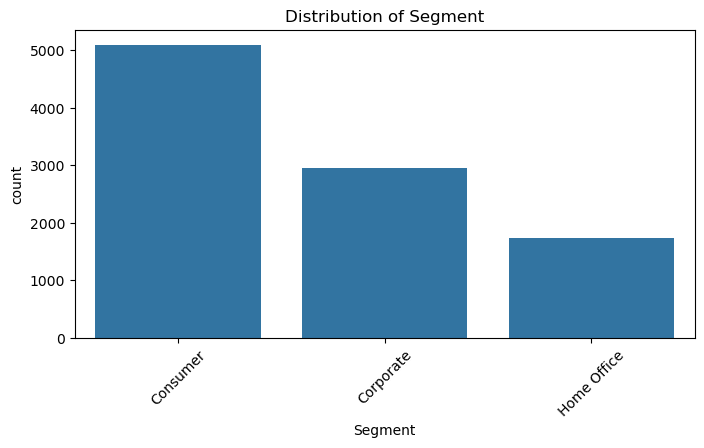

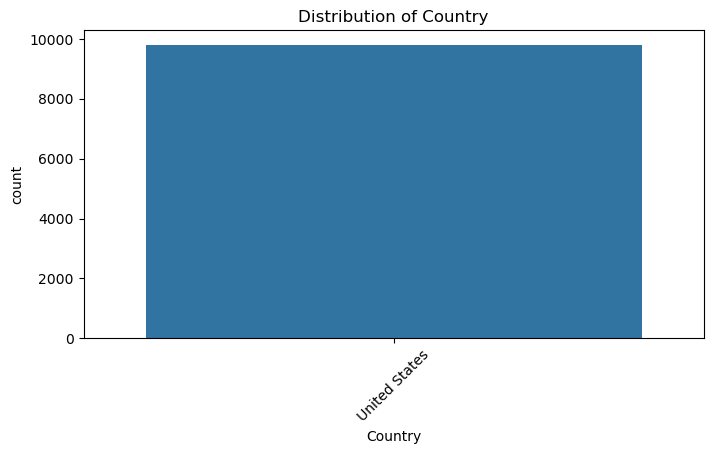

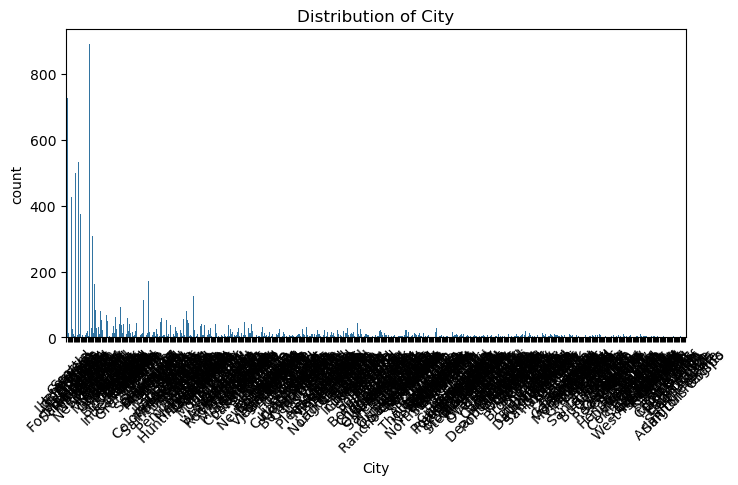

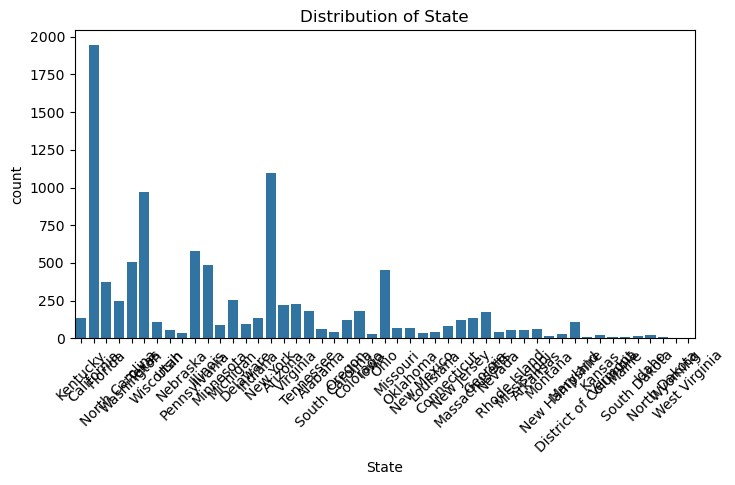

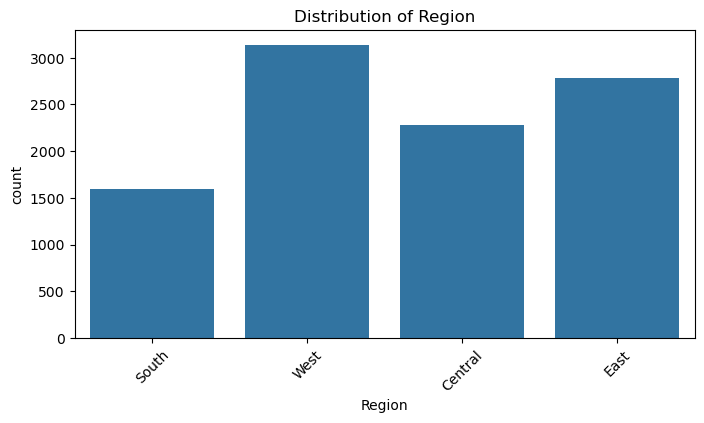

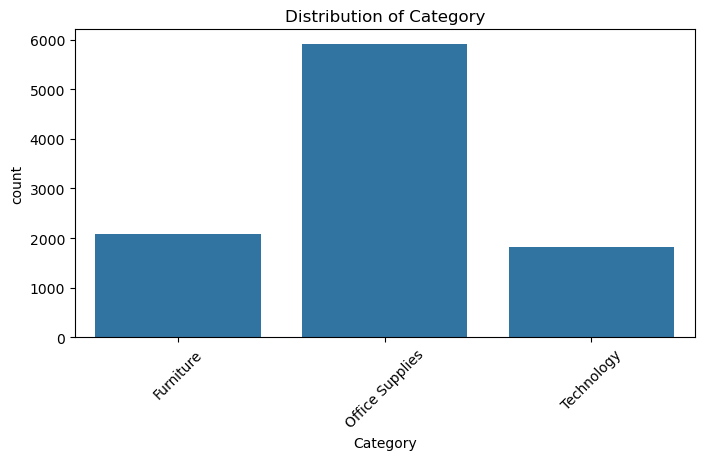

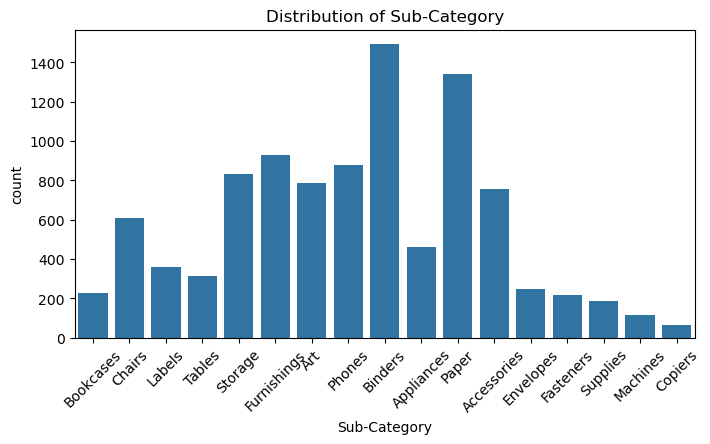

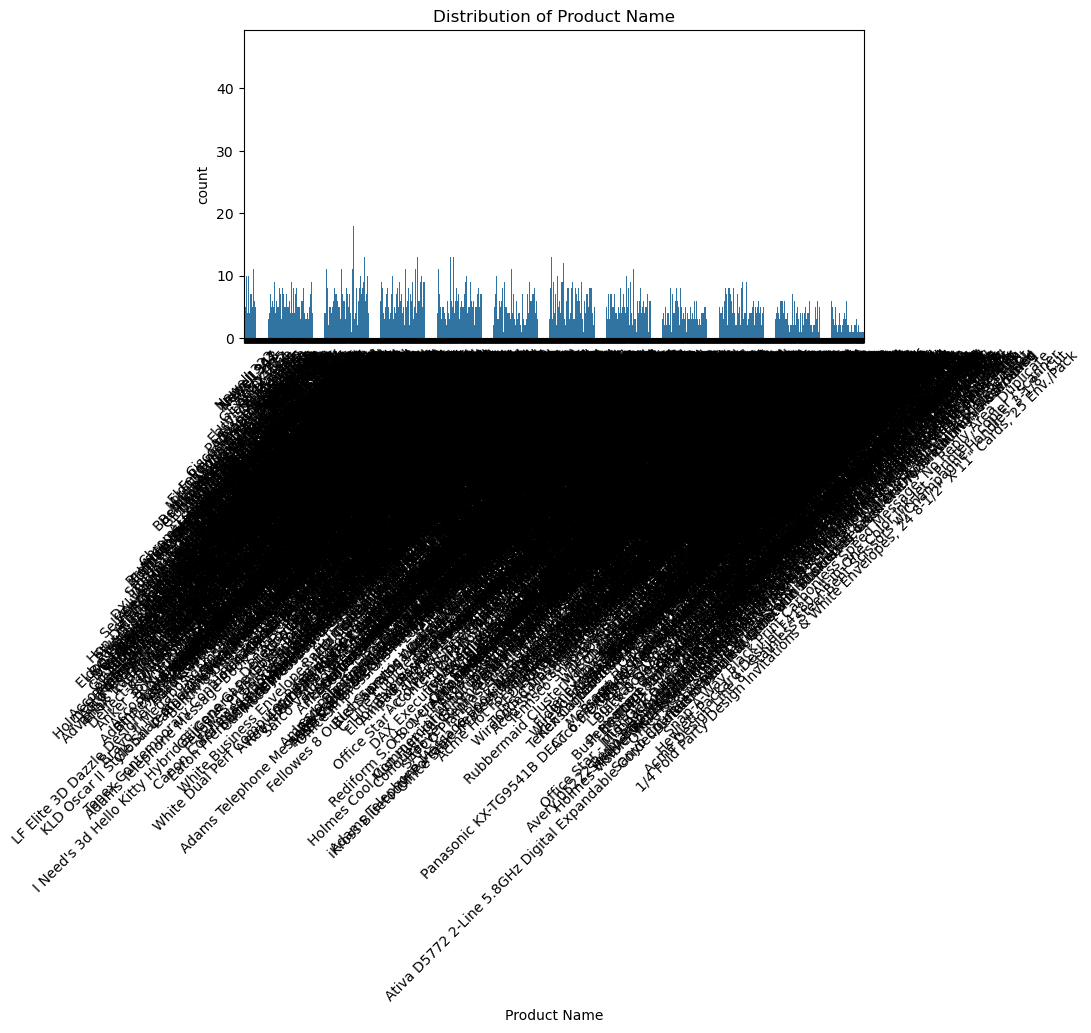

In [24]:
# Bar plots for each categorical variable
for col in categorical_features_df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=categorical_features_df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

## Visualize Correlations: Assessing Relationships between Numeric Features

The correlation matrix is a tool used to measure and visualize the strength and direction of the linear relationships between pairs of numerical variables. In the context of a DataFrame, it calculates the ```Pearson correlation coefficient``` for each pair of numerical columns. The key aspects of interpreting a correlation matrix are as follows:

Correlation Coefficient: ```This value ranges from -1 to 1.```

- 1 indicates a perfect positive linear relationship (as one variable increases, the other variable increases in a fixed proportion).

- -1 indicates a perfect negative linear relationship (as one variable increases, the other decreases in a fixed proportion).

- 0 indicates no linear relationship between the variables.

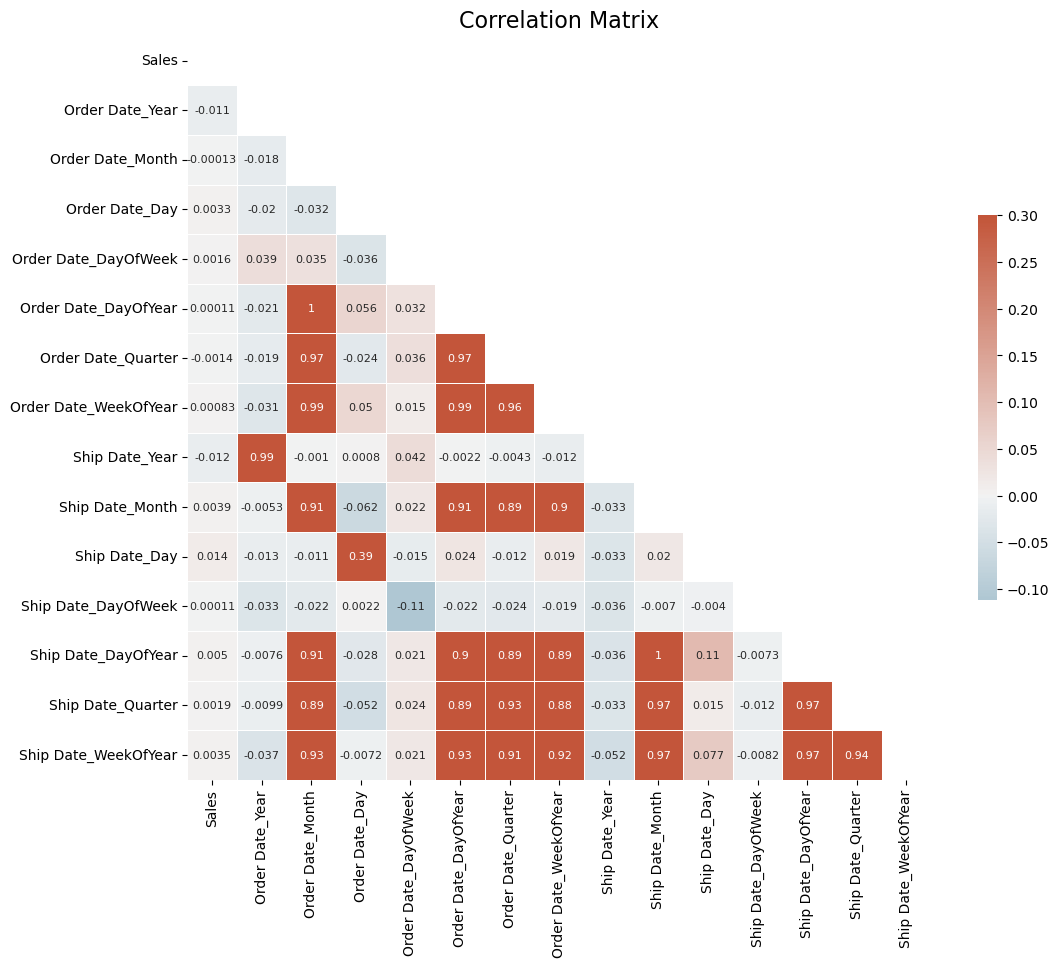

In [25]:
# Define the custom correlation function
def plot_numeric_correlation(df):
    # Select only numeric columns for correlation
    numeric_df = df.select_dtypes(include=[np.number])

    # Calculate the correlation matrix
    corr_matrix = numeric_df.corr()

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 10))

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Define a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})

    # Add title
    plt.title('Correlation Matrix', fontsize=16)

    # Show the plot
    plt.show()

# Call the Function
plot_numeric_correlation(df)


## Chi-Squared Test of Independence: Assessing Relationships between Categorical Features
This test checks if there is a significant association between pairs of categorical variables. ```A low p-value (typically < 0.05)``` suggests that the variables are likely to be related.

In [26]:
def chi_squared_test(df):
    # Select only categorical columns
    categorical_df = df.select_dtypes(include=['object'])
    columns = categorical_df.columns

    # Iterate through pairs of columns only once
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):  # Start from i + 1 to avoid repetition
            col1 = columns[i]
            col2 = columns[j]

            # Creating a contingency table
            contingency_table = pd.crosstab(categorical_df[col1], categorical_df[col2])

            # Chi-squared test
            chi2, p, dof, expected = chi2_contingency(contingency_table)

            # Display results
            print(f"Chi-squared test for {col1} and {col2}:")
            print(f"Chi2 Statistic: {chi2}, p-value: {p}")

            # Highlight if p-value is 0.05 or lower
            if p <= 0.05:
                print("Highlight: Statistically significant relationship detected (p <= 0.05)")
            print("\n")


chi_squared_test(df)


Chi-squared test for Ship Mode and Customer Name:
Chi2 Statistic: 6586.471141216878, p-value: 0.0
Highlight: Statistically significant relationship detected (p <= 0.05)


Chi-squared test for Ship Mode and Segment:
Chi2 Statistic: 25.8399223910806, p-value: 0.00023845903316171724
Highlight: Statistically significant relationship detected (p <= 0.05)


Chi-squared test for Ship Mode and Country:
Chi2 Statistic: 0.0, p-value: 1.0


Chi-squared test for Ship Mode and City:
Chi2 Statistic: 4055.3669220572947, p-value: 4.581607719982764e-216
Highlight: Statistically significant relationship detected (p <= 0.05)


Chi-squared test for Ship Mode and State:
Chi2 Statistic: 426.7540156974472, p-value: 8.822276441346959e-30
Highlight: Statistically significant relationship detected (p <= 0.05)


Chi-squared test for Ship Mode and Region:
Chi2 Statistic: 22.13507324902661, p-value: 0.008460607947774661
Highlight: Statistically significant relationship detected (p <= 0.05)


Chi-squared test for S

## Visualize Outliers

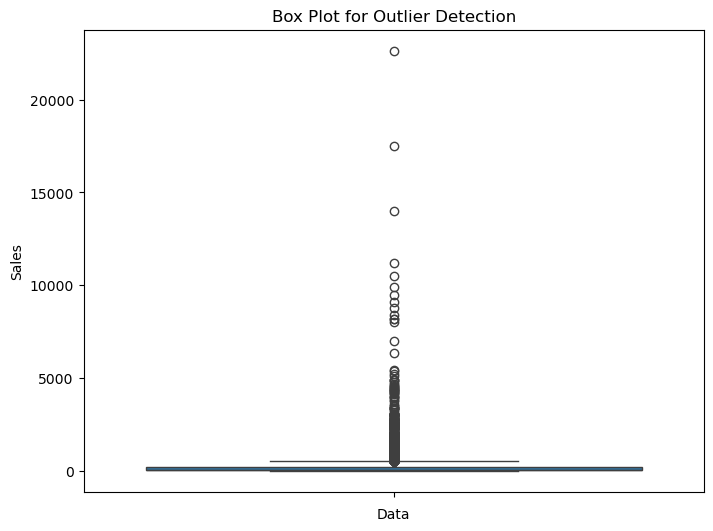

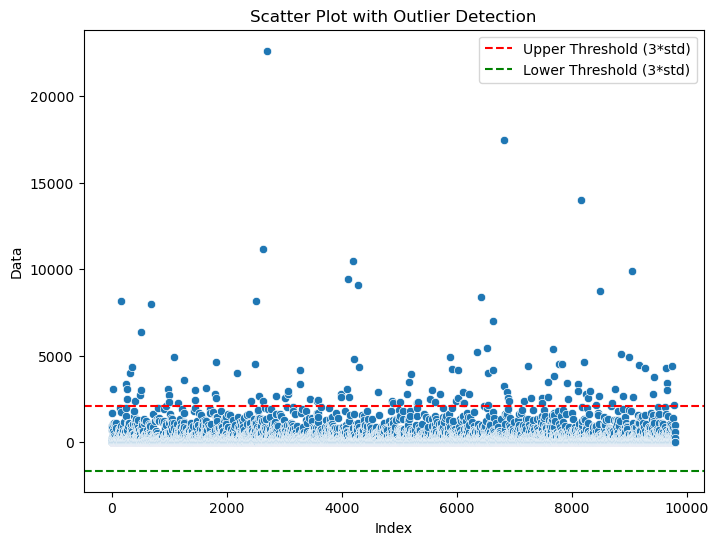

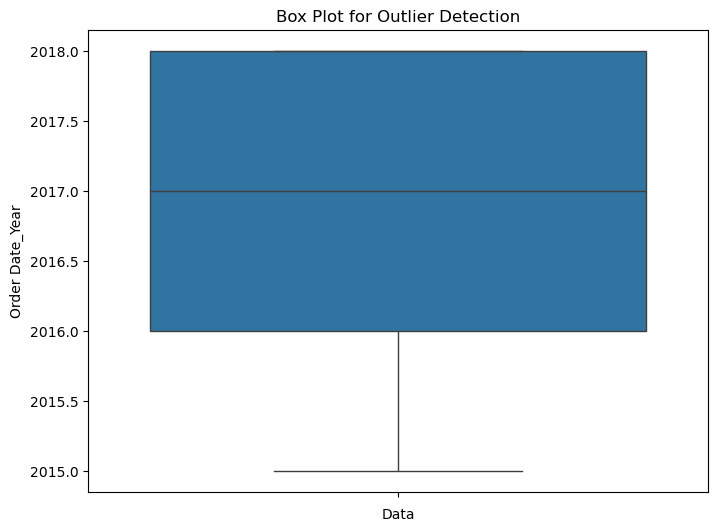

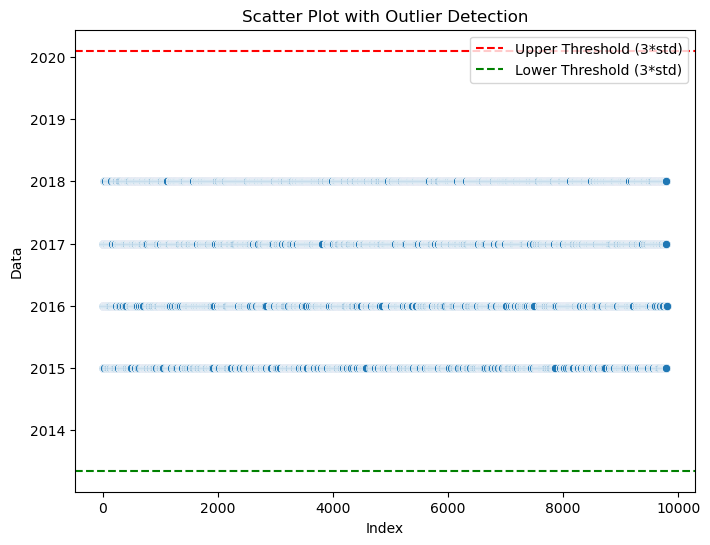

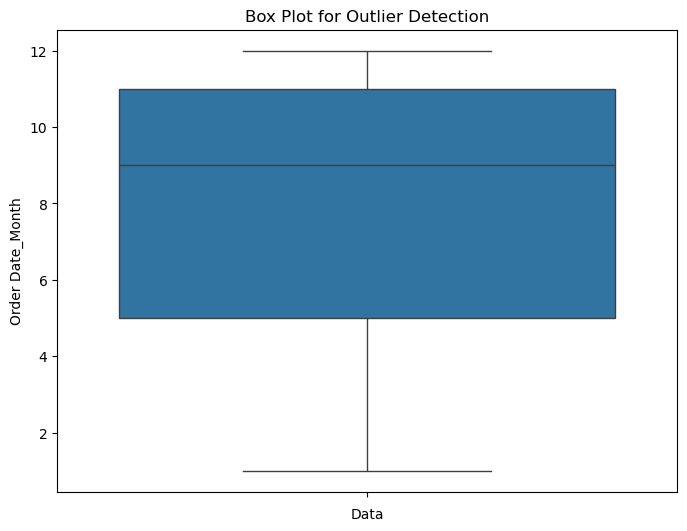

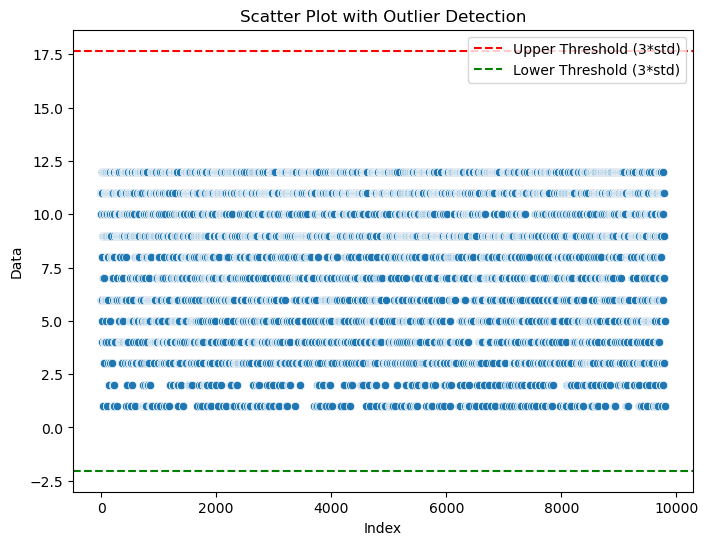

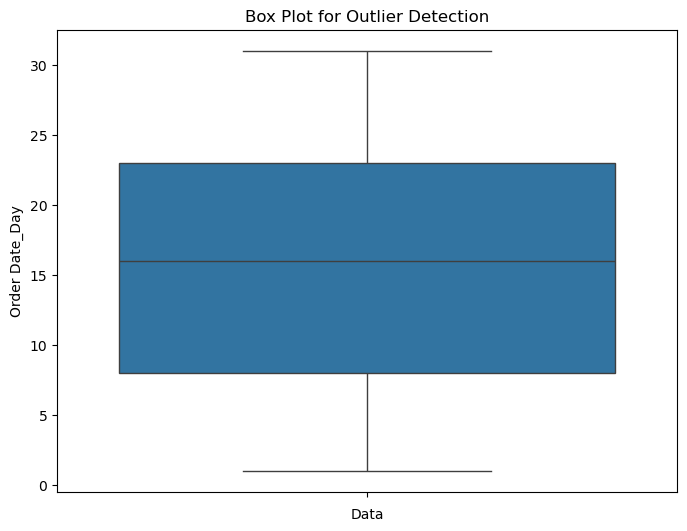

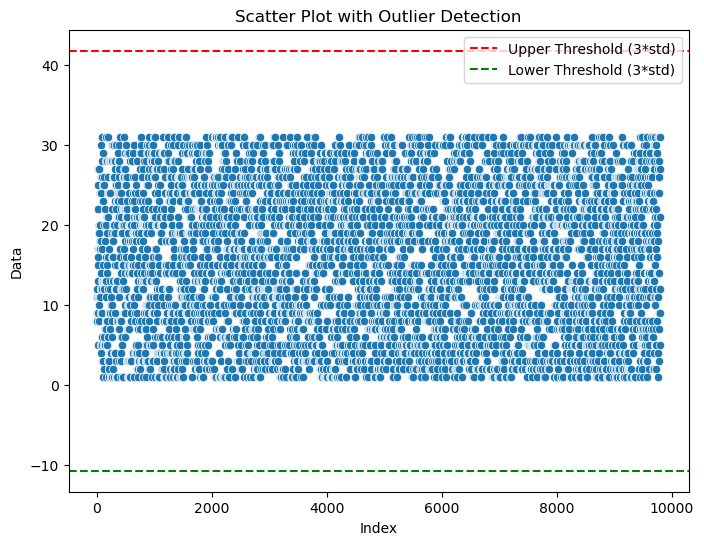

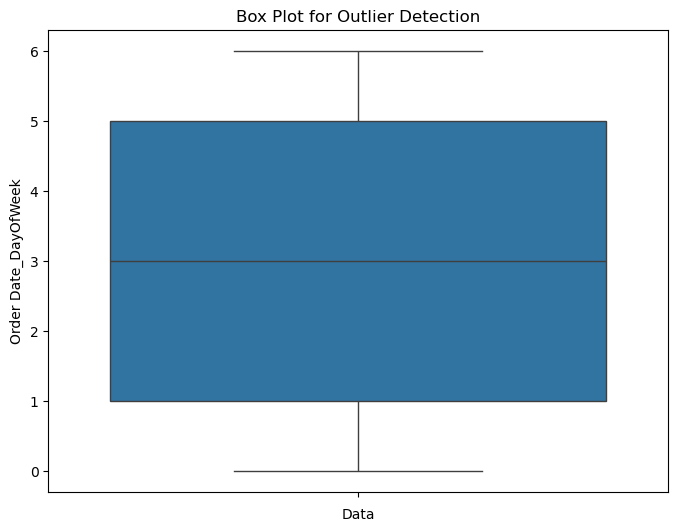

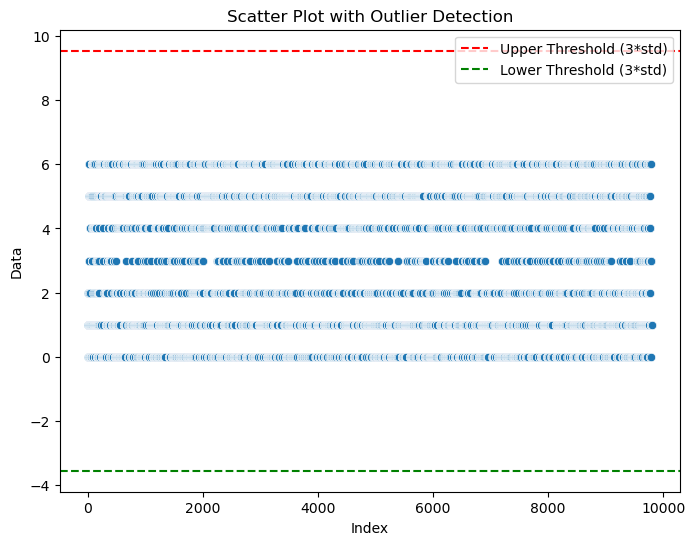

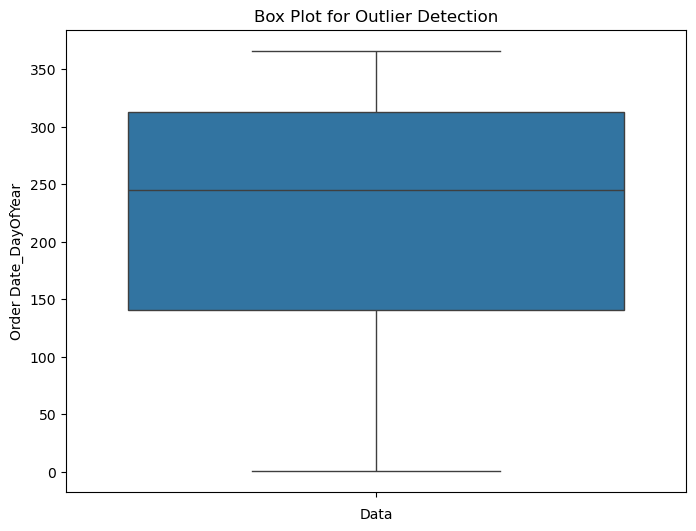

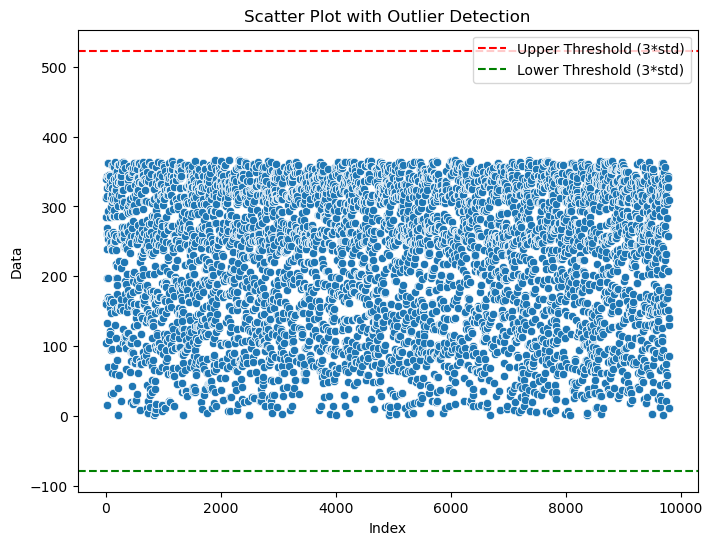

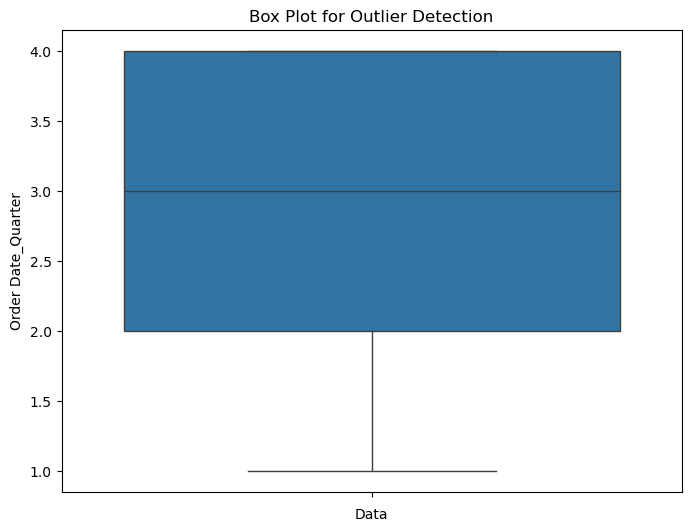

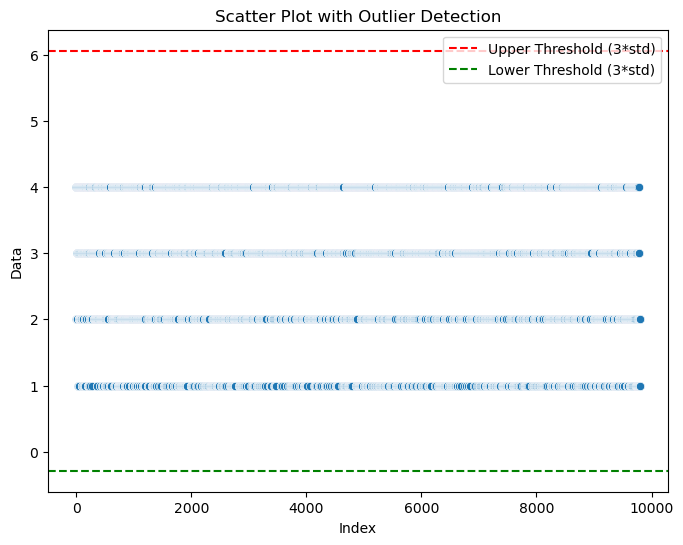

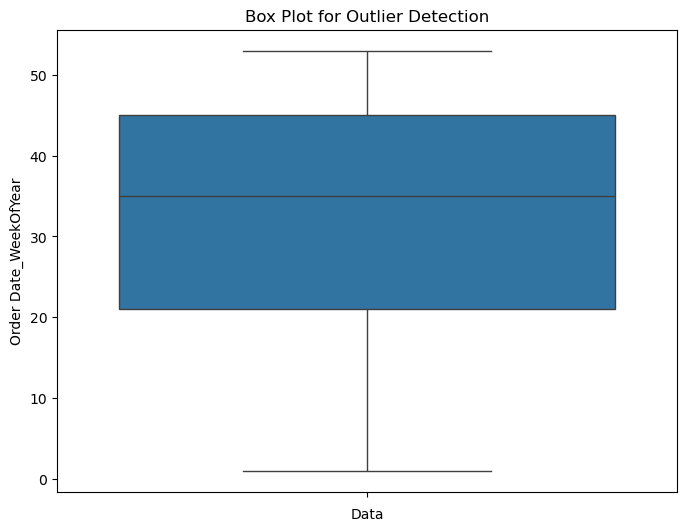

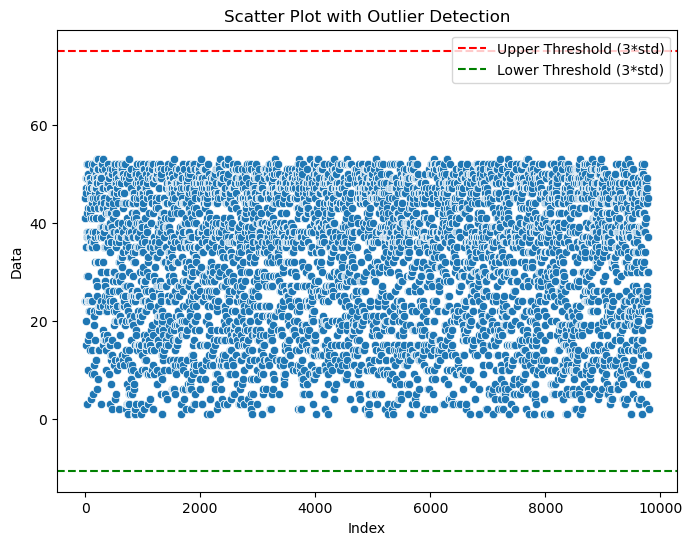

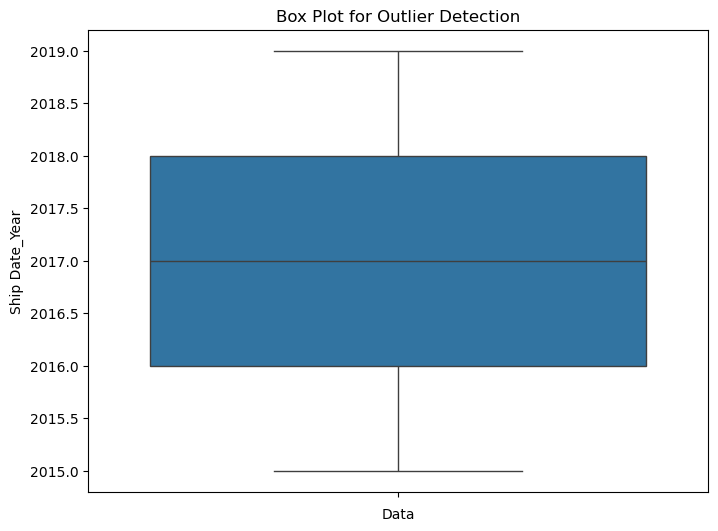

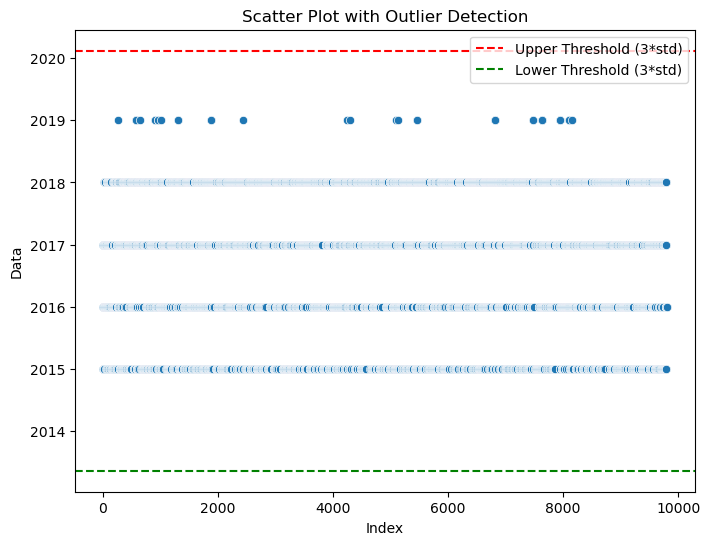

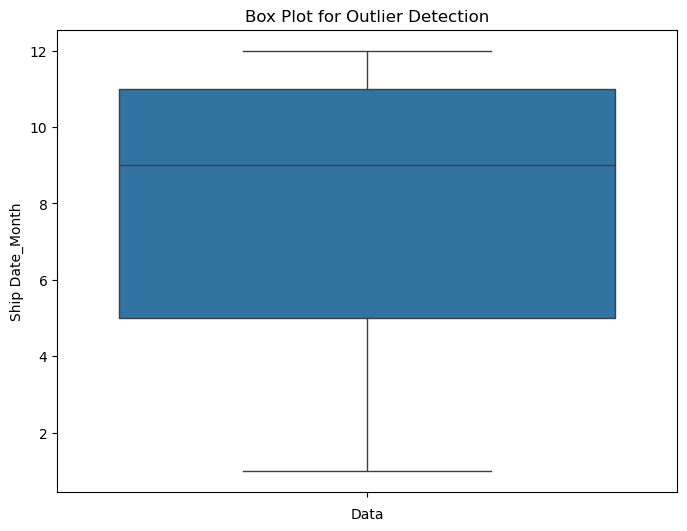

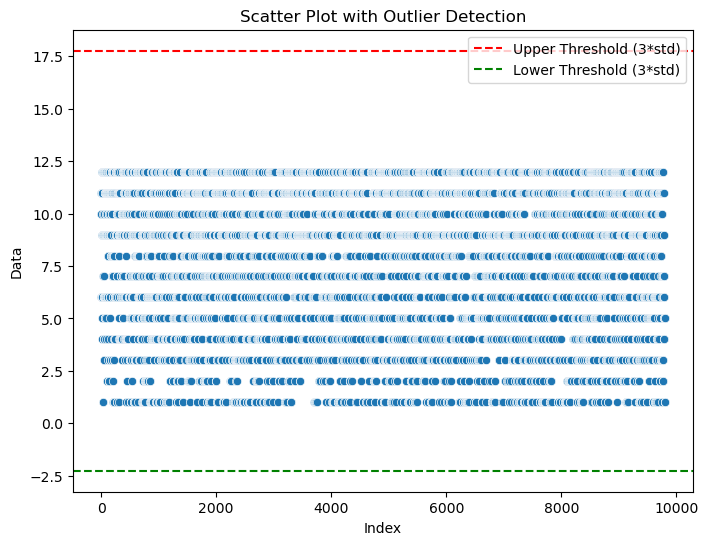

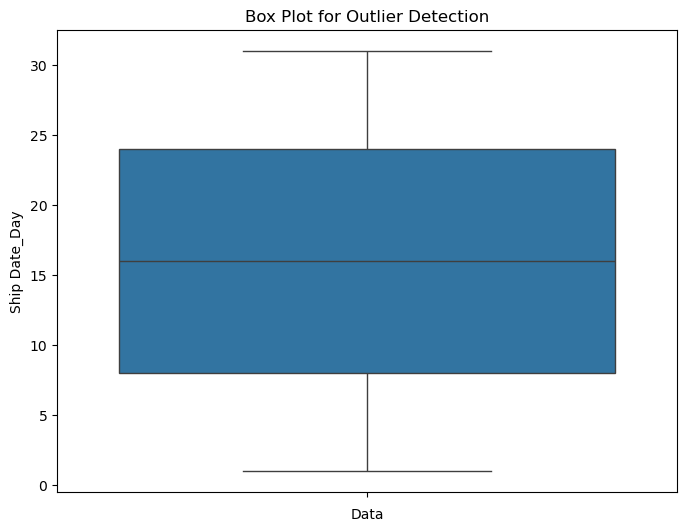

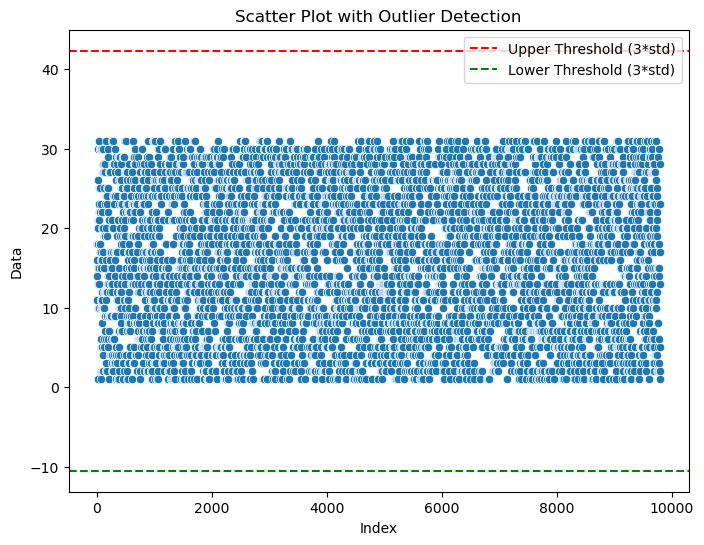

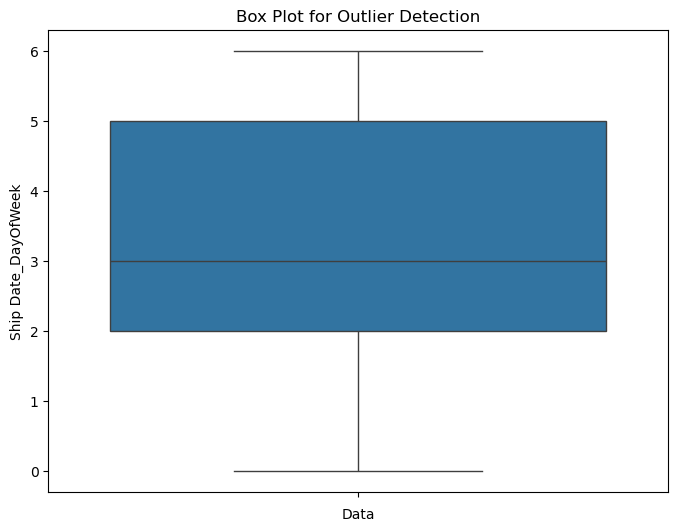

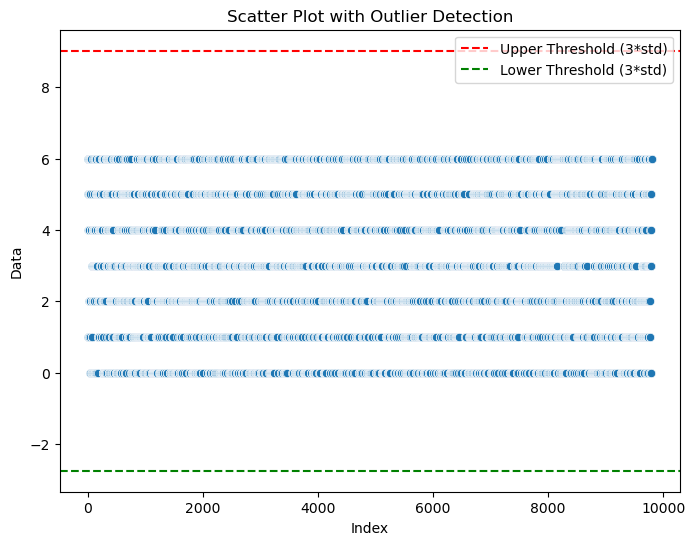

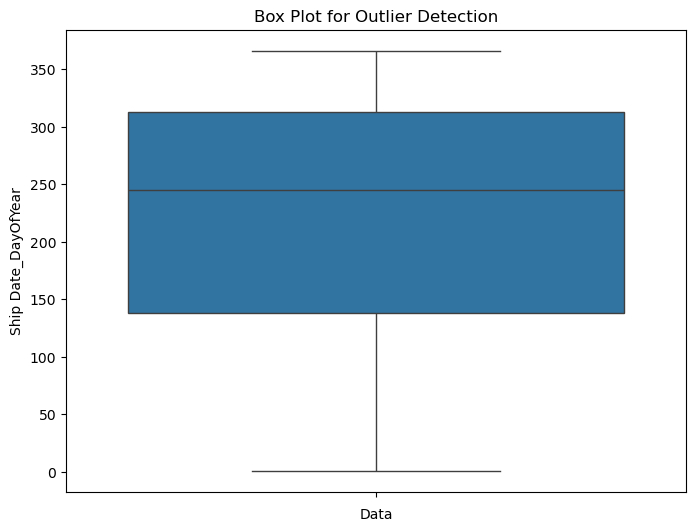

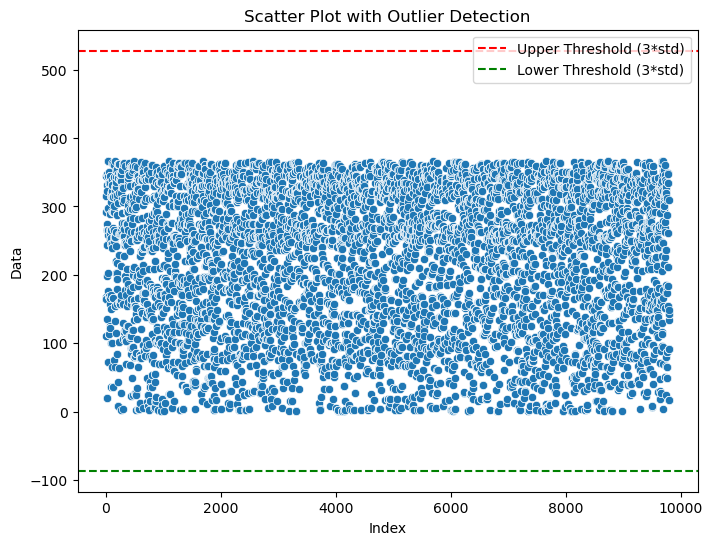

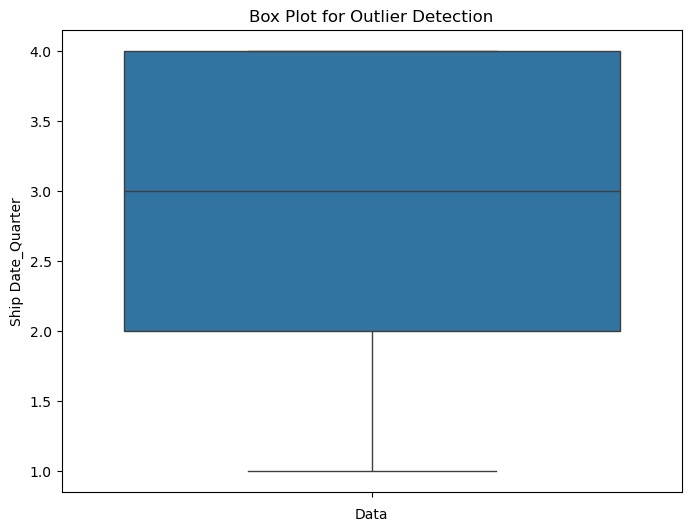

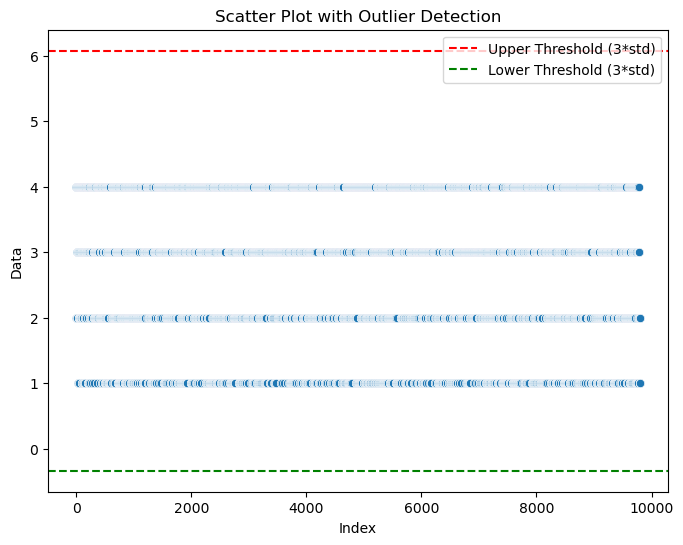

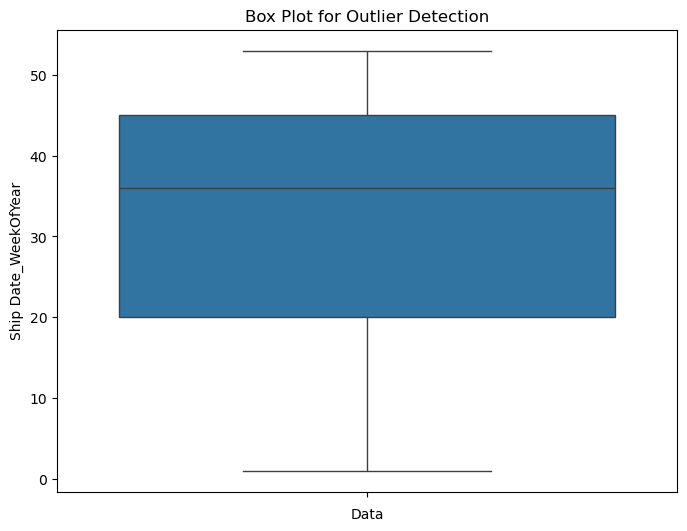

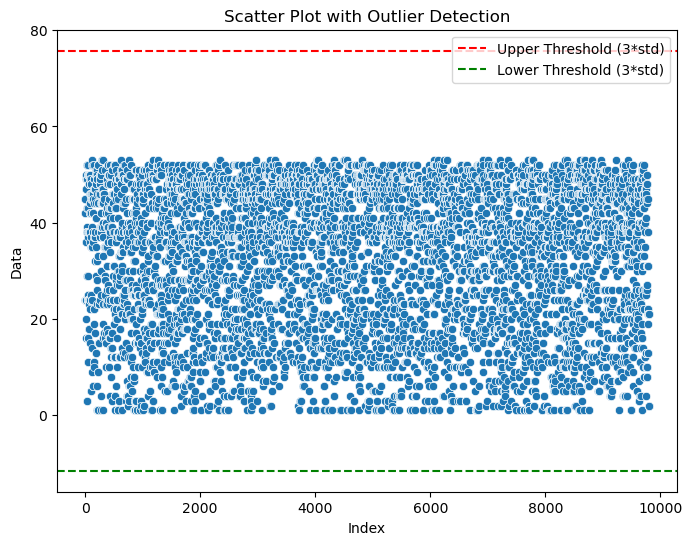

In [27]:
class OutlierVisualizer:
    def __init__(self, data):
        self.data = data

    def visualize_box_plot(self):
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=self.data)
        plt.title("Box Plot for Outlier Detection")
        plt.xlabel("Data")
        plt.show()

    def visualize_scatter_plot(self):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=np.arange(len(self.data)), y=self.data)
        plt.axhline(y=self.data.mean() + 3 * self.data.std(), color='red', linestyle='--', label="Upper Threshold (3*std)")
        plt.axhline(y=self.data.mean() - 3 * self.data.std(), color='green', linestyle='--', label="Lower Threshold (3*std)")
        plt.title("Scatter Plot with Outlier Detection")
        plt.xlabel("Index")
        plt.ylabel("Data")
        plt.legend()
        plt.show()


def visualize_outliers_for_variable(df, variable_name):
    if variable_name not in df.columns:
        print(f"Variable '{variable_name}' not found in the DataFrame.")
        return

    data = df[variable_name]

    # Create an instance of the OutlierVisualizer and visualize outliers
    visualizer = OutlierVisualizer(data)
    visualizer.visualize_box_plot()
    visualizer.visualize_scatter_plot()

# List of numeric variables you want to visualize outliers for
numeric_variables = ['Sales', 'Order Date_Year', 'Order Date_Month', 'Order Date_Day', 'Order Date_DayOfWeek',
                     'Order Date_DayOfYear', 'Order Date_Quarter', 'Order Date_WeekOfYear', 'Ship Date_Year',
                     'Ship Date_Month', 'Ship Date_Day', 'Ship Date_DayOfWeek', 'Ship Date_DayOfYear',
                     'Ship Date_Quarter', 'Ship Date_WeekOfYear']

# Assuming 'df' is your DataFrame
for variable in numeric_variables:
    visualize_outliers_for_variable(df, variable)

## Handle Outliers

In [28]:
class OutlierHandler:
    def __init__(self, df, numerical_features):
        self.df = df
        self.numerical_features = numerical_features

    def remove_outliers_iqr(self):
        for feature in self.numerical_features:
            Q1 = self.df[feature].quantile(0.25)
            Q3 = self.df[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            self.df = self.df[(self.df[feature] >= lower_bound) & (self.df[feature] <= upper_bound)]

# Get the shape of the DataFrame before removing outliers
original_shape = df.shape

# Assuming 'df' is your main DataFrame and 'numerical_features_df' is your list of numerical feature names
outlier_handler = OutlierHandler(df, numerical_features_df)
outlier_handler.remove_outliers_iqr()

# Get the shape of the DataFrame after removing outliers
new_shape = df.shape

# Compare the shapes to check if outliers have been removed
if new_shape != original_shape:
    print("Outliers have been removed.")
else:
    print("No outliers were removed.")


No outliers were removed.


# Feature Engineering and Selection


- [ ]  Split data into training, validation, and test sets
- [ ]  Use filter methods for feature selection (chi-square test, ANOVA, etc.)
- [ ]  Use wrapper methods for feature selection (backward elimination, forward selection, etc.)
- [ ]  Use embedded methods for feature selection (LASSO, ridge regression, etc.)
- [ ]  Normalize/standardize numeric features
- [ ]  Encode categorical features
- [ ]  Create new features based on domain knowledge (if this adds value to the model's performance)

## Split Data into Training, Validation and Test Sets

It is important to properly partition the data to avoid data leakage and ensure unbiased model evaluation.

We will split our data into a training set (for model training), a validation set (for model tuning), and a test set (for final evaluation).

In [29]:
class DataSplitter:
    def __init__(self, data, test_size=0.2, val_size=0.25, random_state=42):
        """
        Initializes the DataSplitter with the provided DataFrame.

        Parameters:
        data (DataFrame): The pandas DataFrame to split.
        test_size (float): The proportion of the dataset to include in the test split.
        val_size (float): The proportion of the training dataset to include in the validation split.
        random_state (int): Controls the shuffling applied to the data before applying the split.
        """
        self.data = data
        self.test_size = test_size
        self.val_size = val_size
        self.random_state = random_state
        self.train_set = None
        self.val_set = None
        self.test_set = None

    def split_data(self):
        """
        Splits the data into training, validation, and test sets.
        """
        # Splitting the data into training and test sets
        train_set, test_set = train_test_split(self.data, test_size=self.test_size, random_state=self.random_state)

        # Splitting the training set further into training and validation sets
        self.train_set, self.val_set = train_test_split(train_set, test_size=self.val_size, random_state=self.random_state)
        self.test_set = test_set

    def get_data_sets(self):
        """
        Returns the training, validation, and test sets.

        Returns:
        tuple: A tuple containing the training, validation, and test DataFrames.
        """
        return self.train_set, self.val_set, self.test_set


splitter = DataSplitter(df)
splitter.split_data()
train_set, val_set, test_set = splitter.get_data_sets()

In [30]:
print("The shape of the original dataframe is:", df.shape)
print("The shape of the training set is:", train_set.shape)
print("The shape of the test set is:", test_set.shape)
print("The shape of the validation set is:", val_set.shape)

The shape of the original dataframe is: (9800, 27)
The shape of the training set is: (5880, 27)
The shape of the test set is: (1960, 27)
The shape of the validation set is: (1960, 27)


## Create New Features

In [31]:
# Function to create a list of holidays
from pandas.tseries.holiday import USFederalHolidayCalendar
from datetime import datetime

def get_us_federal_holidays(years):
    cal = USFederalHolidayCalendar()
    holidays = cal.holidays(start=f'{min(years)}-01-01', end=f'{max(years)}-12-31')
    return holidays

# Create a class to add new time series relevant features
class TimeSeriesFeatureEngineer:
    def __init__(self, date_column, sales_column):
        self.date_column = date_column
        self.sales_column = sales_column

    def add_time_related_features(self, df):
        df['IsWeekend'] = df[self.date_column].dt.dayofweek >= 5
        return df

    def add_lag_features(self, df, lags=[1]):
        '''
        Lag features represent the values of a specific variable from previous time steps.
        They are particularly useful in capturing trends and patterns over time.
        '''
        for lag in lags:
            df[f'{self.sales_column}_Lag_{lag}'] = df[self.sales_column].shift(lag)
        return df

    def add_rolling_features(self, df, windows=[7]):
        '''
        Rolling window features capture the trend and seasonality over a specific period.
        For instance, a 7-day rolling average can smooth out daily fluctuations and reveal the weekly trend.
        '''
        for window in windows:
            df[f'{self.sales_column}_Rolling_{window}'] = df[self.sales_column].rolling(window=window).mean()
        return df

    def add_holiday_feature(self, df):
        years = df[self.date_column].dt.year.unique()
        holiday_dates = get_us_federal_holidays(years)
        df['IsHoliday'] = df[self.date_column].isin(holiday_dates).astype(int)
        return df

    def transform(self, df):
        df = self.add_time_related_features(df)
        df = self.add_lag_features(df, lags=[1])  # Add more lags as needed
        df = self.add_rolling_features(df, windows=[7])  # Add more windows as needed
        df = self.add_holiday_feature(df)
        return df

# Adding new time series features
feature_engineer = TimeSeriesFeatureEngineer(date_column='Order Date', sales_column='Sales')
train_set = feature_engineer.transform(train_set)
val_set = feature_engineer.transform(val_set)
test_set = feature_engineer.transform(test_set)

## Feature Transformation

In this section, we will standardize our numeric features and encode our categorical features. In the case of numeric features, we standardize so that each numeric feature will be on the same scale; this mitigates the possibility of one variable having greater weight on the model because of differences in magnitude.

For our categorical features, it is important to translate the object information to numeric data. Most machine learning models can only work with numeric features, so in order to meet this requirement, we transform our categorical features to dummy variables.

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np

class DataImputerAndPreprocessor:
    def __init__(self, numeric_features, categorical_features, impute_strategy="most_frequent"):
        """
        Initializes the class with lists of numeric and categorical features.
        """
        self.numeric_features = numeric_features
        self.categorical_features = categorical_features
        self.numeric_imputer = SimpleImputer(strategy="mean")  # Impute strategy for numeric features
        self.categorical_imputer = SimpleImputer(strategy=impute_strategy)  # Impute strategy for categorical features
        self.scaler = StandardScaler()
        self.encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

    def fit(self, df):
        """
        Fits the preprocessing transformers to the DataFrame.
        """
        # Impute missing values
        self.numeric_imputer.fit(df[self.numeric_features])
        self.categorical_imputer.fit(df[self.categorical_features])

        # Scale and encode features
        self.scaler.fit(df[self.numeric_features])
        self.encoder.fit(df[self.categorical_features])

    def transform(self, df):
        """
        Applies the preprocessing transformations to the DataFrame and returns the transformed DataFrame.
        """
        df = df.copy()

        # Impute missing values
        df[self.numeric_features] = self.numeric_imputer.transform(df[self.numeric_features])
        df[self.categorical_features] = self.categorical_imputer.transform(df[self.categorical_features])

        # Normalize numeric features
        df[self.numeric_features] = self.scaler.transform(df[self.numeric_features])

        # Encode categorical features
        encoded_features = self.encoder.transform(df[self.categorical_features])

        # Obtain feature names
        if hasattr(self.encoder, 'get_feature_names_out'):
            encoded_feature_names = self.encoder.get_feature_names_out(self.categorical_features)
        else:
            # Manually create feature names for older versions
            encoded_feature_names = []
            for i, category in enumerate(self.encoder.categories_):
                encoded_feature_names.extend([f'{self.categorical_features[i]}_{cat}' for cat in category])

        # Create a DataFrame from the encoded features
        encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

        # Drop original categorical columns and concatenate encoded features
        df.drop(columns=self.categorical_features, inplace=True)
        df.reset_index(drop=True, inplace=True)  # Reset index to avoid concatenation issues
        encoded_df.reset_index(drop=True, inplace=True)
        df = pd.concat([df, encoded_df], axis=1)

        return df


numeric_features = train_set.select_dtypes(include=[np.number]).columns.drop('Sales').tolist()
categorical_features = train_set.select_dtypes(exclude=[np.number]).columns.tolist()

preprocessor = DataImputerAndPreprocessor(numeric_features, categorical_features)
preprocessor.fit(train_set)
transformed_train_set = preprocessor.transform(train_set)
transformed_val_set = preprocessor.transform(val_set)
transformed_test_set = preprocessor.transform(test_set)

/Users/drjodyannjones/opt/anaconda3/envs/time_series/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Feature Selection

In [33]:
def select_features(data, target, corr_threshold=0.2, anova_threshold=0.05):
    """
    Selects features based on Pearson correlation for numeric features and ANOVA for categorical features.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the features and target.
    target (str): The name of the target variable column.
    corr_threshold (float): The correlation threshold for numeric feature selection.
    anova_threshold (float): The p-value threshold for ANOVA feature selection.

    Returns:
    list: A list of selected feature names.
    """
    selected_features = []

    # Numeric Features: Pearson Correlation
    numeric_features = data.select_dtypes(include=[np.number]).drop(target, axis=1)
    correlation_matrix = numeric_features.corrwith(data[target])
    selected_numeric = correlation_matrix[correlation_matrix.abs() > corr_threshold].index.tolist()
    selected_features.extend(selected_numeric)

    # Categorical Features: ANOVA
    categorical_features = data.select_dtypes(exclude=[np.number])
    for cat_feature in categorical_features:
        groups = data.groupby(cat_feature)[target].apply(list)
        if len(groups) > 1:
            f_value, p_value = f_oneway(*groups)
            if p_value < anova_threshold:
                selected_features.append(cat_feature)

    return selected_features

selected_features = select_features(df, 'Sales', corr_threshold=0.2, anova_threshold=0.05)
print("Selected features:", selected_features)

Selected features: ['State', 'Category', 'Sub-Category', 'Product Name']


## Summary of DataFrames in Use

In [34]:
# Creating a dictionary to keep track of the DataFrames
dataframes = {
    'df': {
        'dataframe': df,
        'description': 'Original, unmodified DataFrame.'
    },
    'train_set': {
        'dataframe': train_set,
        'description': 'Training set split from the original DataFrame, before any preprocessing.'
    },
    'val_set': {
        'dataframe': val_set,
        'description': 'Validation set split from the original DataFrame, before any preprocessing.'
    },
    'test_set': {
        'dataframe': test_set,
        'description': 'Test set split from the original DataFrame, before any preprocessing.'
    },
    'transformed_train_set': {
        'dataframe': transformed_train_set,
        'description': 'Training set after feature engineering and preprocessing (normalization, encoding).'
    },
    'transformed_val_set': {
        'dataframe': transformed_val_set,
        'description': 'Validation set after feature engineering and preprocessing.'
    },
    'transformed_test_set': {
        'dataframe': transformed_test_set,
        'description': 'Test set after feature engineering and preprocessing.'
    },
    'numerical_features_df': {
        'dataframe': numerical_features_df,
        'description': 'DataFrame containing only the numerical features.'
    },
    'categorical_features_df': {
        'dataframe': categorical_features_df,
        'description': 'DataFrame containing only the categorical features.'
    }
}

# Function to easily access and get information about the DataFrames
def get_dataframe_info(name):
    if name in dataframes:
        df_info = dataframes[name]
        print(f"Description: {df_info['description']}")
        print(f"Metadata:\n{df_info['dataframe'].info()}")
        return df_info['dataframe']
    else:
        print(f"No DataFrame found with the name: {name}")
        return None


In [35]:
# Output the dataframes to processed folder
processed_path = '../data/processed/'

df.to_csv(processed_path + 'df.csv', index=False)
train_set.to_csv(processed_path + 'train_set.csv', index=False)
test_set.to_csv(processed_path + 'test_set.csv', index=False)
val_set.to_csv(processed_path + 'val_set.csv', index=False)
transformed_train_set.to_csv(processed_path + 'transformed_train_set.csv', index=False)
transformed_test_set.to_csv(processed_path + 'transformed_test_set.csv', index=False)
transformed_val_set.to_csv(processed_path + 'transformed_val_set.csv', index=False)
numerical_features_df.to_csv(processed_path + 'numerical_features_df.csv', index=False)
categorical_features_df.to_csv(processed_path + 'categorical_features_df.csv', index=False)

## Dimensionality Reduction

In [36]:
from sklearn.decomposition import PCA

# Create a class to reduce the dimensionality of the data using PCA.
class PCAReducer:
    def __init__(self, n_components=None, variance_threshold=None):
        self.n_components = n_components
        self.variance_threshold = variance_threshold
        if n_components is not None:
            self.pca = PCA(n_components=n_components)
        elif variance_threshold is not None:
            self.pca = PCA(n_components=variance_threshold)
        else:
            raise ValueError("Either n_components or variance_threshold must be set")

    def fit_transform(self, X):
        """
        Fit the PCA on the data and then transform the data.
        """
        return self.pca.fit_transform(X)

    def transform(self, X):
        """
        Transform the data using the fitted PCA.
        """
        return self.pca.transform(X)

    def get_reduced_feature_count(self):
        """
        Returns the number of components after PCA transformation.
        """
        return self.pca.n_components_


In [37]:
# Fit and Transform the Training Set
pca_reducer = PCAReducer(n_components=10)  # You can adjust the number of components or variance threshold

# Extract features and target from the training set
X_train = transformed_train_set.drop('Sales', axis=1)
y_train = transformed_train_set['Sales']

# Fit and transform the training set
X_train_pca = pca_reducer.fit_transform(X_train)

In [38]:
# Tranform the Validation and Test Sets
X_val = transformed_val_set.drop('Sales', axis=1)
X_test = transformed_test_set.drop('Sales', axis=1)

X_val_pca = pca_reducer.transform(X_val)
X_test_pca = pca_reducer.transform(X_test)

In [39]:
# Create a Summary Table for PCA Component Contributions
def create_pca_summary(pca_model, original_features, n_top_features=3):
    """
    Creates a summary DataFrame mapping PCA components to the top contributing original features.

    Parameters:
    - pca_model: Trained PCA model.
    - original_features: List of original feature names.
    - n_top_features: Number of top features to include for each component.

    Returns:
    - Summary DataFrame.
    """
    loadings = pca_model.components_
    summary_df = pd.DataFrame(index=[f'PCA_Component_{i+1}' for i in range(loadings.shape[0])])

    for i, component in enumerate(loadings):
        top_features = pd.Series(component, index=original_features).abs().nlargest(n_top_features).index.tolist()
        summary_df.loc[f'PCA_Component_{i+1}', 'Top Features'] = ', '.join(top_features)

    return summary_df

# Create the PCA summary table
pca_summary_df = create_pca_summary(pca_reducer.pca, X_train.columns)
print(pca_summary_df)


                                                                  Top Features
PCA_Component_1   Order Date_Month, Order Date_DayOfYear, Ship Date_WeekOfYear
PCA_Component_2           Ship Date_Year, Order Date_Year, Ship Date_DayOfWeek
PCA_Component_3               Order Date_DayOfWeek, IsHoliday, IsWeekend_False
PCA_Component_4                 Ship Date_Day, Order Date_Day, Sales_Rolling_7
PCA_Component_5                   Sales_Lag_1, Sales_Rolling_7, Order Date_Day
PCA_Component_6           Ship Date_DayOfWeek, IsHoliday, Order Date_DayOfWeek
PCA_Component_7               IsHoliday, Order Date_DayOfWeek, IsWeekend_False
PCA_Component_8             Ship Date_Day, Order Date_Day, Ship Date_DayOfYear
PCA_Component_9         Sales_Lag_1, Sales_Rolling_7, Category_Office Supplies
PCA_Component_10                    Region_West, State_California, Region_East


In [40]:
# Create a styled dataframe to highlight significant cells
def style_pca_dataframe(df, threshold=0.5):
    """
    Applies styling to a DataFrame to highlight significant cells.
    Only numerical cells will be considered for highlighting.

    Parameters:
    - df: DataFrame to be styled.
    - threshold: Threshold for highlighting significant cells.

    Returns:
    - Styled DataFrame.
    """
    def highlight_significant(val):
        try:
            return 'background-color: blue' if abs(val) >= threshold else ''
        except TypeError:
            return ''  # Return empty string for non-numerical values

    return df.style.applymap(highlight_significant)

# Convert PCA-transformed data to DataFrame and apply styling
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PCA_Component_{i+1}' for i in range(X_train_pca.shape[1])]).round(3)
X_val_pca_df = pd.DataFrame(X_val_pca, columns=[f'PCA_Component_{i+1}' for i in range(X_val_pca.shape[1])]).round(3)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PCA_Component_{i+1}' for i in range(X_test_pca.shape[1])]).round(3)

# Display the first five rows of the transformed training set with styling
X_train_pca_styled_df = style_pca_dataframe(X_train_pca_df.head())
X_train_pca_styled_df


/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_55122/3183753193.py:20: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  return df.style.applymap(highlight_significant)


## PCA Transformation Summary

In the PCA-transformed DataFrame (`X_train_pca_df`), each row represents a transformed version of an original data point (or record) from the dataset, transformed_train_set. 

Specifically:

- **Rows**: Each row corresponds to a single observation or entry from the transformed_train_set, transformed into the new feature space defined by the principal components. We still have 5,880 observations, each now described by the principal components instead of the original features from transformed_train_set.

- **Columns (`PCA_Component_1`, `PCA_Component_2`, etc.)**: Each column represents one of the principal components. These components are new features created by PCA, which are linear combinations of the original features in transformed_train_set. The values in these columns indicate the "coordinates" or "projections" of the original data points onto these new features.

For instance:

- The value in the first row and the first column (`1.746000` under `PCA_Component_1`) is the projection of the first original data point onto the first principal component.

- Similarly, the value in the second row and the first column (`3.192000` under `PCA_Component_1`) is the projection of the second original data point onto the first principal component, and so on.

This transformation is useful because PCA components capture the most significant variance in the data, making them helpful in improving the performance of our model.

# Model Selection and Training

- [ ]  Identify suitable models based on the problem type (classification, regression, clustering, etc.)
- [ ]  Train models using the training dataset
- [ ]  Tune hyperparameters using grid search, random search, Bayesian optimization, etc.
- [ ]  Monitor training process for overfitting or underfitting
- [ ]  Validate models using the validation dataset